# Project: Food and Nutrition 
-----------------------------------------------
Data Science Using Python


The main objective is to explore a comprehensive dataset on food items, their nutritional attributes, and how they are related to CHOLESTEROL. 

# Introduction 

Read the following websites related to the dataset 
* https://corgis-edu.github.io/corgis/csv/food/
* https://www.ars.usda.gov/northeast-area/beltsville-md-bhnrc/beltsville-human-nutrition-research-center/food-surveys-research-group/docs/fndds-download-databases/
* https://www.ars.usda.gov/ARSUserFiles/80400530/pdf/fndds/FNDDS_2017_2018_factsheet.pdf





*   I've taken the Food and Nutrition dataset which contains different types of vitamins, fats, minerals and other nutrients
*   The main objective is to analyze and predict the cholesterol using other variables in the dataset

*  Based on the analysis, different insights are provided from the data
*  Prediction of cholesterol is done by different modelling techniques using regression and classification.


*   Based on the model performance and other metrics, we determine the best model for the best results







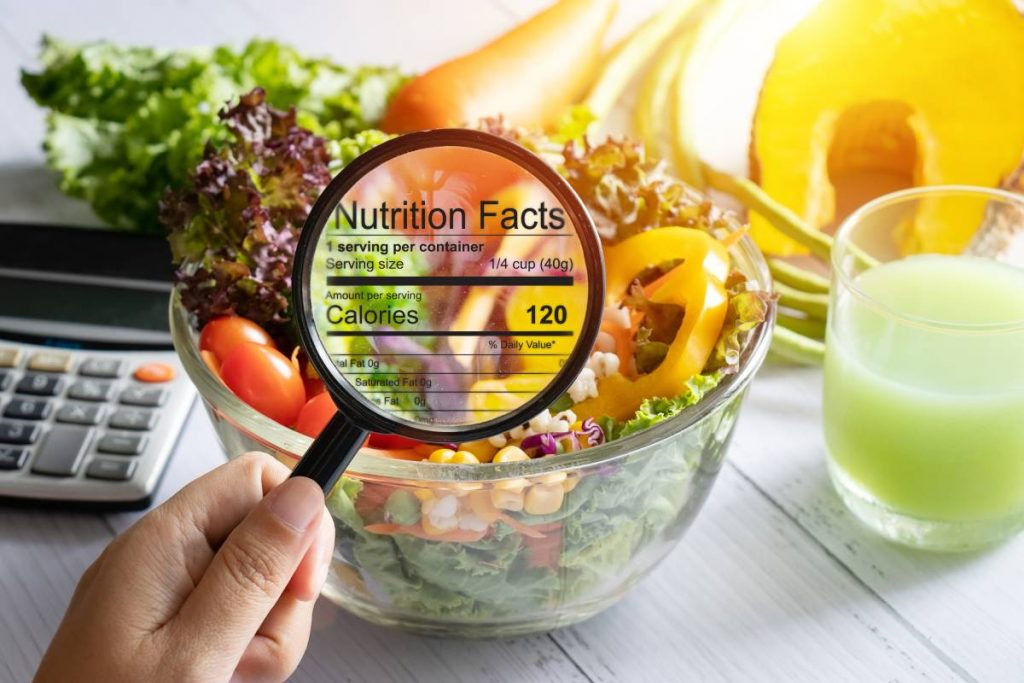

# Import Modules

In [ ]:
# Importing pandas module
import pandas as pd
# Importing numpy module
import numpy as np
# Importing matplotlib module
import matplotlib.pyplot as plt
import seaborn as sns

# Read Data from Website 

## **Reading in Data and Printing the Shape:**

Reading in the data:

In [ ]:
# Reading the data from the website
df = pd.read_csv('https://corgis-edu.github.io/corgis/datasets/csv/food/food.csv')

Printing the shape of the data:

In [ ]:
# Printing the shape of data
print('Shape of Data (Rows, Columns):',df.shape)

Shape of Data (Rows, Columns): (7083, 38)


## **Nutrient Count (including cholesterol)**


Using df.head() to take a look at the dataset to look for unique nutrient characteristics.

In [ ]:
# Printing the first five rows
df.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,14,51,17,0.17,61,0.05,0.011,5.0,0.08,0.3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,103,157,39,0.42,59,0.56,0.060,0.1,0.03,0.2
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,86,253,3,0.38,29,0.36,0.034,0.9,0.08,0.3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,101,150,38,0.41,32,0.54,0.061,0.0,0.05,0.3


All of the nutrient columns were selected using the "Data." portion of their column names. This was used to select all nutrient columns becuase each column that represented nutrient data began with "Data.".

In [ ]:
# Printing the Number of Nutrients
print('Number of Nutrients:',len(df.loc[0,df.columns.str.startswith('Data.')]))

Number of Nutrients: 35


# Random Sampling
Taking a random sample.

* Shuffle the dataframe with a random seed equal to a number, and then take a random sample of 90% of the original data without replacement 

In [ ]:
# Sampling the data
df_shuffled = df.sample(frac = 0.9, replace= False, random_state=12)
# Printing the shape of dataframe
print(df_shuffled.shape)

(6375, 38)


# Missing Values 
.

## **Checking For Null Values: Method 1**

In [ ]:
# Checking for info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7083 entries, 0 to 7082
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Category                        7083 non-null   object 
 1   Description                     7083 non-null   object 
 2   Nutrient Data Bank Number       7083 non-null   int64  
 3   Data.Alpha Carotene             7083 non-null   int64  
 4   Data.Beta Carotene              7083 non-null   int64  
 5   Data.Beta Cryptoxanthin         7083 non-null   int64  
 6   Data.Carbohydrate               7083 non-null   float64
 7   Data.Cholesterol                7083 non-null   int64  
 8   Data.Choline                    7083 non-null   float64
 9   Data.Fiber                      7083 non-null   float64
 10  Data.Lutein and Zeaxanthin      7083 non-null   int64  
 11  Data.Lycopene                   7083 non-null   int64  
 12  Data.Niacin                     70

## **Checking For Null Values: Method 2**

In [ ]:
# Checking the missing values by column
df.isna().sum()

Category                          0
Description                       0
Nutrient Data Bank Number         0
Data.Alpha Carotene               0
Data.Beta Carotene                0
Data.Beta Cryptoxanthin           0
Data.Carbohydrate                 0
Data.Cholesterol                  0
Data.Choline                      0
Data.Fiber                        0
Data.Lutein and Zeaxanthin        0
Data.Lycopene                     0
Data.Niacin                       0
Data.Protein                      0
Data.Retinol                      0
Data.Riboflavin                   0
Data.Selenium                     0
Data.Sugar Total                  0
Data.Thiamin                      0
Data.Water                        0
Data.Fat.Monosaturated Fat        0
Data.Fat.Polysaturated Fat        0
Data.Fat.Saturated Fat            0
Data.Fat.Total Lipid              0
Data.Major Minerals.Calcium       0
Data.Major Minerals.Copper        0
Data.Major Minerals.Iron          0
Data.Major Minerals.Magnesiu

In [ ]:
# Checking the total missing values in the dataframe
df.isna().sum().sum()

0

# Literature Review and Basic EDA 


## Lit review 
There is wonderful information on each of the nutrients here:
* https://corgis-edu.github.io/corgis/csv/food/



**Citations**
1. How to lower cholesterol naturally without medication" - (https://www.medicalnewstoday.com/articles/325113#monounsaturated-fats)





2. “Cutting Through the Cholesterol Confusion” (https://www.webmd.com/food-recipes/features/cholesterol-food)




3. “Cholesterol Content of Foods” (https://www.ucsfhealth.org/education/cholesterol-content-of-foods#:~:text=If%20you%20have%20risk%20factors,than%20300%20milligrams%20a%20day.)



4. "Is the Cholesterol in Your Food Really a Concern?" - (https://www.pennmedicine.org/updates/blogs/heart-and-vascular-blog/2016/april/is-the-cholesterol-in-your-food-really-a-concern)



5. “Elevated high-density lipoprotein cholesterol levels in older endurance athletes” (https://pubmed.ncbi.nlm.nih.gov/6465022/#:~:text=Thus%2C%20some%20older%20endurance%20athletes,older%20men%20who%20exercise%20regularly.)



6. "7 High-Cholesterol Foods That Are Super Healthy" - (https://www.healthline.com/nutrition/7-healthy-high-cholesterol-foods)


7. Common Foods High in Cholesterolhttps://khealth.com/learn/high-cholesterol/what-food-causes-high-cholesterol/



8. "What can you eat on a low-carb diet?"(https://www.medicalnewstoday.com/articles/321545#ten-low-carb-diet-tips)
"Top 5 Best Keto Friendly Sweeteners (Plus 3 to Avoid)"(https://www.carbmanager.com/article/xtqe4beaaciaci7a/best-keto-friendly-sweeteners/)



9. "What Happens to Your Cholesterol When You Go on a Keto Diet?"(https://www.everydayhealth.com/ketogenic-diet/what-happens-to-your-cholesterol-on-a-keto-diet/)



10. "High cholesterol" (https://www.mayoclinic.org/diseases-conditions/high-blood-cholesterol/symptoms-causes/syc-20350800#:~:text=Your%20body%20needs%20cholesterol%20to,to%20flow%20through%20your%20arteries.)



11. "Top 5 Best Keto Friendly Sweeteners (Plus 3 to Avoid)"(https://www.carbmanager.com/article/xtqe4beaaciaci7a/best-keto-friendly-sweeteners/)


INTRODUCTION 

**[1]** Cholesterol is a waxy, fat-like substance that the liver produces. It is also present in animal-based foods. Cholesterol supports many essential bodily functions, but high levels can lead to health issues. **[2]** The majority of individuals are unaware that cholesterol found in food is not the same as cholesterol that clogs arteries. To be sure, high-cholesterol diets can raise cholesterol levels in the blood.The amount of cholesterol you eat from food is determined by the combination of fats, carbohydrates and other nutrients in your diet. **[3]** If a person has heart disease risk factors, that person should limit cholesterol consumption to no more than 200 milligrams per day otherwise they should limit cholesterol intake to no more than 300 milligrams per day. **[4]** However, fats present in plant products like olive oil, many seeds and nuts, and some seafood, on the other hand, have the capacity to lower blood cholesterol. **[5]** When compared to their inactive peers, some elderly endurance athletes had significantly greater HDL cholesterol levels and lower TC/HDL cholesterol ratios. For older men who exercise frequently, this good plasma lipoprotein profile may imply a lower risk of coronary artery disease. **[6]** There are some products like cheese, goat liver and shellfish with high cholesterol levels that are healthy but over consumption may cause health issues. **[7]** Foods like red meat, processed meat, egg yolk and alcohol tend to have high cholesterol levels. **[1]** Everyone can lower cholesterol naturally without medication by consuming more monounsaturated fats, polyunsaturated fats and more soluble fiber. **[8]** From a study, it showed that low-carb diet helps in lowering the cholesterol levels. Low-carb diets limit the number of carbohydrates a person eats. Instead of carbs, people focus on eating proteins, healthful fats, and vegetables. **[9]** On the keto diet, each day you’re eating up to 80 percent of your calories from fat and sticking with 20 to 50 grams of net carbs, a term used in popular diets, including keto. This will have negative impact on cholesterol if they consume more unsaturated fats because of keto diet. **[10]** Low-density lipoprotein (LDL), the "bad" cholesterol, transports cholesterol particles throughout your body. LDL cholesterol builds up in the walls of your arteries, making them hard and narrow. High-density lipoprotein (HDL). HDL, the "good" cholesterol, picks up excess cholesterol and takes it back to your liver.

## Unique values from `Category` 


### `Category` Unique Value Count:

In [ ]:
# Printing the Unique value count in the catrgory column
print('Number of Unique Values in the "Category" Column:',len(df['Category'].unique()))

Number of Unique Values in the "Category" Column: 2429


### `Category` Frequency Table:

In [ ]:
# Count of different categories in the category column
tmp = df['Category'].value_counts()
# Printing the categories count
print('Category Frequency Table:')
print('')
tmp

Category Frequency Table:



Infant formula                          173
Rice                                    143
Bread                                   119
Potato                                  105
Cookie                                  100
                                       ... 
Layer dip                                 1
Bean dip                                  1
Refried beans with meat                   1
Black bean salad                          1
Industrial oil as ingredient in food      1
Name: Category, Length: 2429, dtype: int64

### `Category` Frequency Table Histogram:

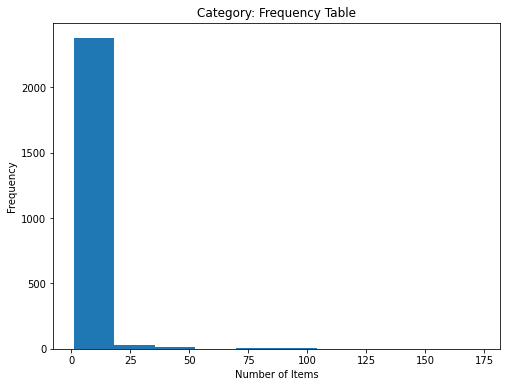

In [ ]:
plt.figure(figsize=(8,6))
plt.hist(tmp)
#plt.xlim([0,50])
#plt.xticks(range(0,50))
plt.title('Category: Frequency Table')
plt.ylabel('Frequency')
plt.xlabel('Number of Items')
plt.show()

## Correlation

  * fat-related
  * major minerals-related
  * vitamins-related
  * none of the above ('Alpha Carotene' through and including 'Water')



### Entire Dataset

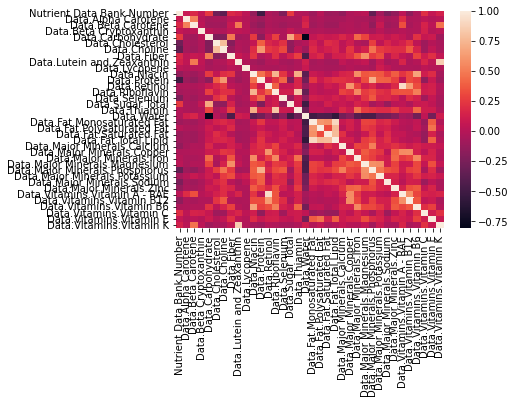

In [ ]:
# Imporing seaborn module
import seaborn as sns
# Correlation function
corr = df.corr()
# Plotting Heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
# Showing plot
plt.show()

In [ ]:
# Making the columns to list
df.columns.tolist()

['Category',
 'Description',
 'Nutrient Data Bank Number',
 'Data.Alpha Carotene',
 'Data.Beta Carotene',
 'Data.Beta Cryptoxanthin',
 'Data.Carbohydrate',
 'Data.Cholesterol',
 'Data.Choline',
 'Data.Fiber',
 'Data.Lutein and Zeaxanthin',
 'Data.Lycopene',
 'Data.Niacin',
 'Data.Protein',
 'Data.Retinol',
 'Data.Riboflavin',
 'Data.Selenium',
 'Data.Sugar Total',
 'Data.Thiamin',
 'Data.Water',
 'Data.Fat.Monosaturated Fat',
 'Data.Fat.Polysaturated Fat',
 'Data.Fat.Saturated Fat',
 'Data.Fat.Total Lipid',
 'Data.Major Minerals.Calcium',
 'Data.Major Minerals.Copper',
 'Data.Major Minerals.Iron',
 'Data.Major Minerals.Magnesium',
 'Data.Major Minerals.Phosphorus',
 'Data.Major Minerals.Potassium',
 'Data.Major Minerals.Sodium',
 'Data.Major Minerals.Zinc',
 'Data.Vitamins.Vitamin A - RAE',
 'Data.Vitamins.Vitamin B12',
 'Data.Vitamins.Vitamin B6',
 'Data.Vitamins.Vitamin C',
 'Data.Vitamins.Vitamin E',
 'Data.Vitamins.Vitamin K']



*   Most of the variables in the dataframe are positively correlated



### Fat Related

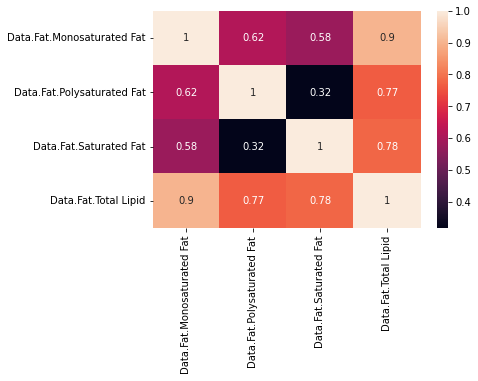

In [ ]:
# Subsetting the Columns
df_fat = df[['Category',
 'Description','Data.Fat.Monosaturated Fat',
 'Data.Fat.Polysaturated Fat',
 'Data.Fat.Saturated Fat',
 'Data.Fat.Total Lipid']]
df_fat.head()
# Importing the seaborn module
import seaborn as sns
# Correlation function
corr = df_fat.corr()
# Plotting heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, annot = True)
# Showing plot
plt.show()




*   In fats, there are no variables that are negatively correlated.
*   Saturated Fat and Total Lipids are highly correlated.



###Major minerals

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


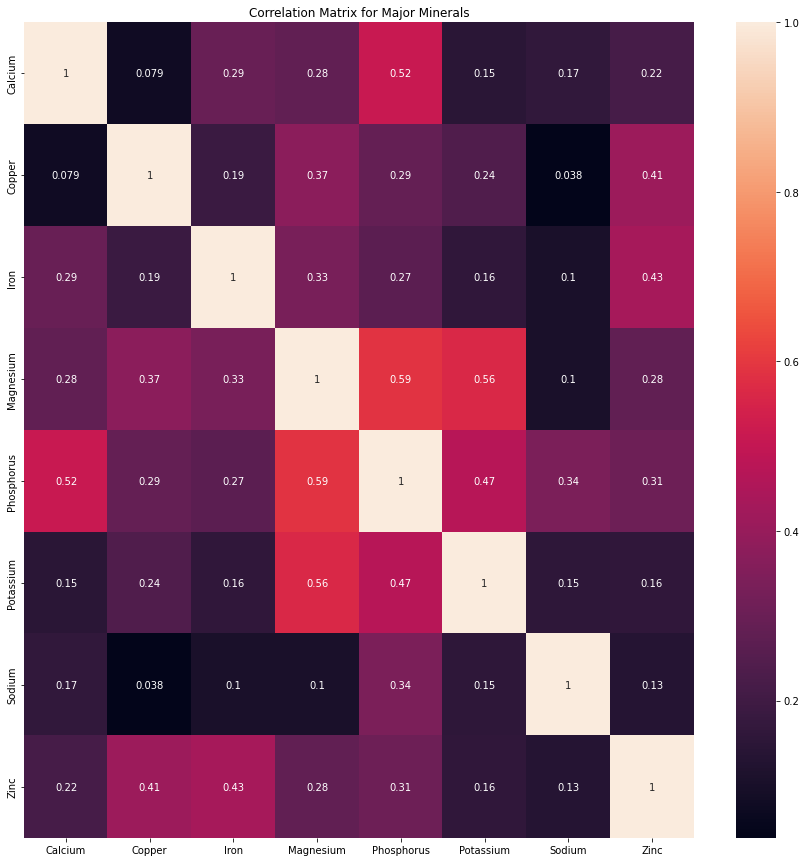

In [ ]:
%pylab
 # Subsetting the minerals column
minerals = ['Data.Major Minerals.Calcium',
 'Data.Major Minerals.Copper',
 'Data.Major Minerals.Iron',
 'Data.Major Minerals.Magnesium',
 'Data.Major Minerals.Phosphorus',
 'Data.Major Minerals.Potassium',
 'Data.Major Minerals.Sodium',
 'Data.Major Minerals.Zinc']
df_mineral = df[minerals]
# Getting the five columns of the dataframe
df_mineral.head()
# Adjusting the Figure size
figsize(15,15)
# Setting column name
col = ['Calcium',
 'Copper',
 'Iron',
 'Magnesium',
 'Phosphorus',
 'Potassium',
 'Sodium',
 'Zinc']
 # Correlation Function
corr = df_mineral.corr()
# Plotting the heatmap
sns.heatmap(corr, 
            xticklabels=col,
            yticklabels=col, annot = True)
# Title of the graph
plt.title('Correlation Matrix for Major Minerals')
# Showing plot
plt.show()



*   Magnesium and Phosphorus are most correlated among minerals
*   (Magnesium, sodium) and (Iron, sodium) are least correlated in minerals



###Major Vitamins

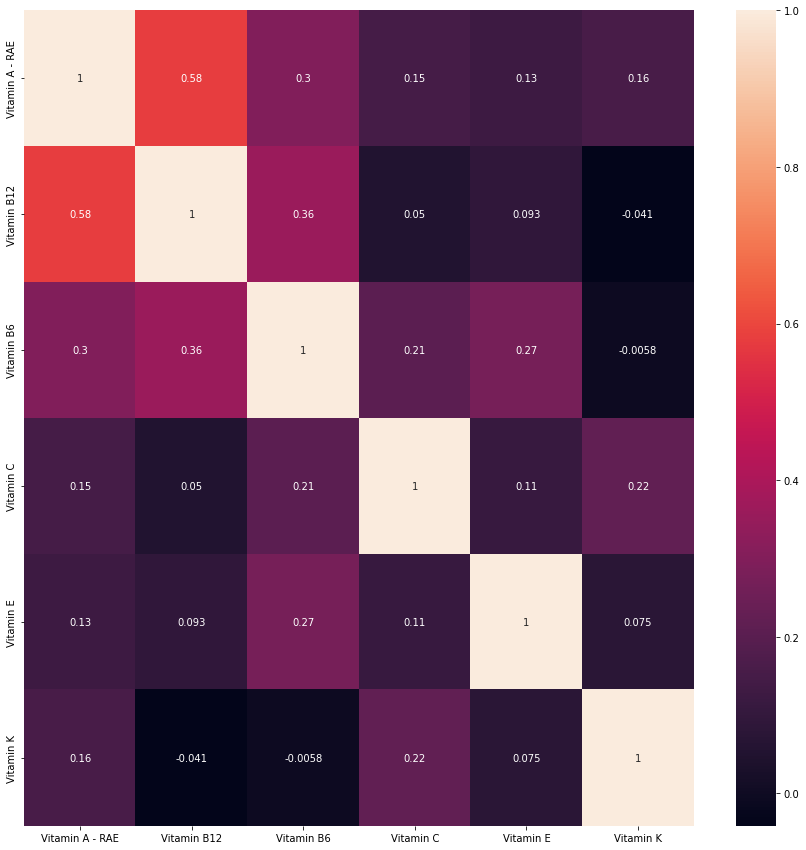

In [ ]:
# Subsetting the columns
vitamins = ['Data.Vitamins.Vitamin A - RAE',
 'Data.Vitamins.Vitamin B12',
 'Data.Vitamins.Vitamin B6',
 'Data.Vitamins.Vitamin C',
 'Data.Vitamins.Vitamin E',
 'Data.Vitamins.Vitamin K']
df_vitamin = df[vitamins]
df_vitamin.head()
# Adjusting the Figure Size
figsize(15,15)
# Changing Column names
col = ['Vitamin A - RAE',
 'Vitamin B12',
 'Vitamin B6',
 'Vitamin C',
 'Vitamin E',
 'Vitamin K']
 # Correlation Function
corr = df_vitamin.corr()
# Plotting the heatmap
sns.heatmap(corr, 
            xticklabels=col,
            yticklabels=col, annot = True)
# Showing the plot
plt.show()



*   Vitamin A and Vitamin B12 are highly correlated among vitamins
*   Vitamin B12 and Vitamin K are least correlated among vitamins



###Other Nutrients

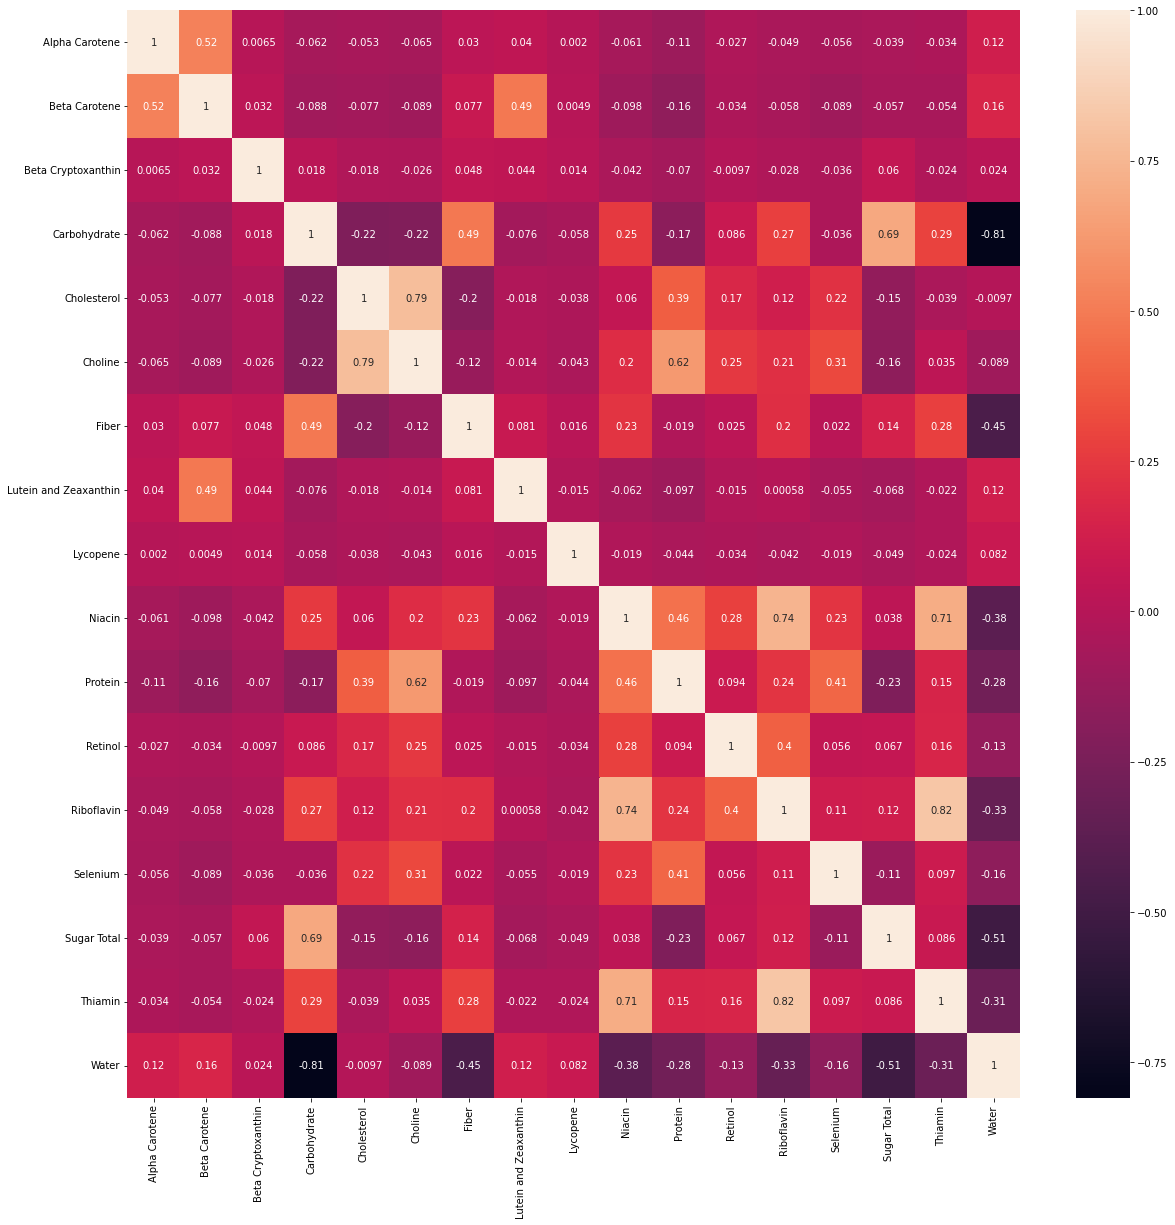

In [ ]:
from IPython.core.pylabtools import figsize
others = ['Data.Alpha Carotene',
 'Data.Beta Carotene',
 'Data.Beta Cryptoxanthin',
 'Data.Carbohydrate',
 'Data.Cholesterol',
 'Data.Choline',
 'Data.Fiber',
 'Data.Lutein and Zeaxanthin',
 'Data.Lycopene',
 'Data.Niacin',
 'Data.Protein',
 'Data.Retinol',
 'Data.Riboflavin',
 'Data.Selenium',
 'Data.Sugar Total',
 'Data.Thiamin',
 'Data.Water']
df_other = df[others]
figsize(20,20)
col = ['Alpha Carotene',
 'Beta Carotene',
 'Beta Cryptoxanthin',
 'Carbohydrate',
 'Cholesterol',
 'Choline',
 'Fiber',
 'Lutein and Zeaxanthin',
 'Lycopene',
 'Niacin',
 'Protein',
 'Retinol',
 'Riboflavin',
 'Selenium',
 'Sugar Total',
 'Thiamin',
 'Water']
corr = df_other.corr()
sns.heatmap(corr, 
            xticklabels=col,
            yticklabels=col, annot = True)
plt.show()


*   The highly correlated varaibles in nutrients are Riboflavin and Thiamin
*   Water and carbohydrates are least correlated among the nutrients

## Feature Engineering: Net Carbs 
Read this article.
* https://www.trifectanutrition.com/blog/how-to-calculate-net-carbs-for-keto-in-2-simple-steps

### A new feature called NetCarbs

In [ ]:
# Feature Engineering
# Calculate a new feature called NetCarbs 
tmp = df
tmp['NetCarbs'] = tmp['Data.Carbohydrate'] - tmp['Data.Fiber']

### Relationship between net carbs and cholesterol

-0.21188274713897326


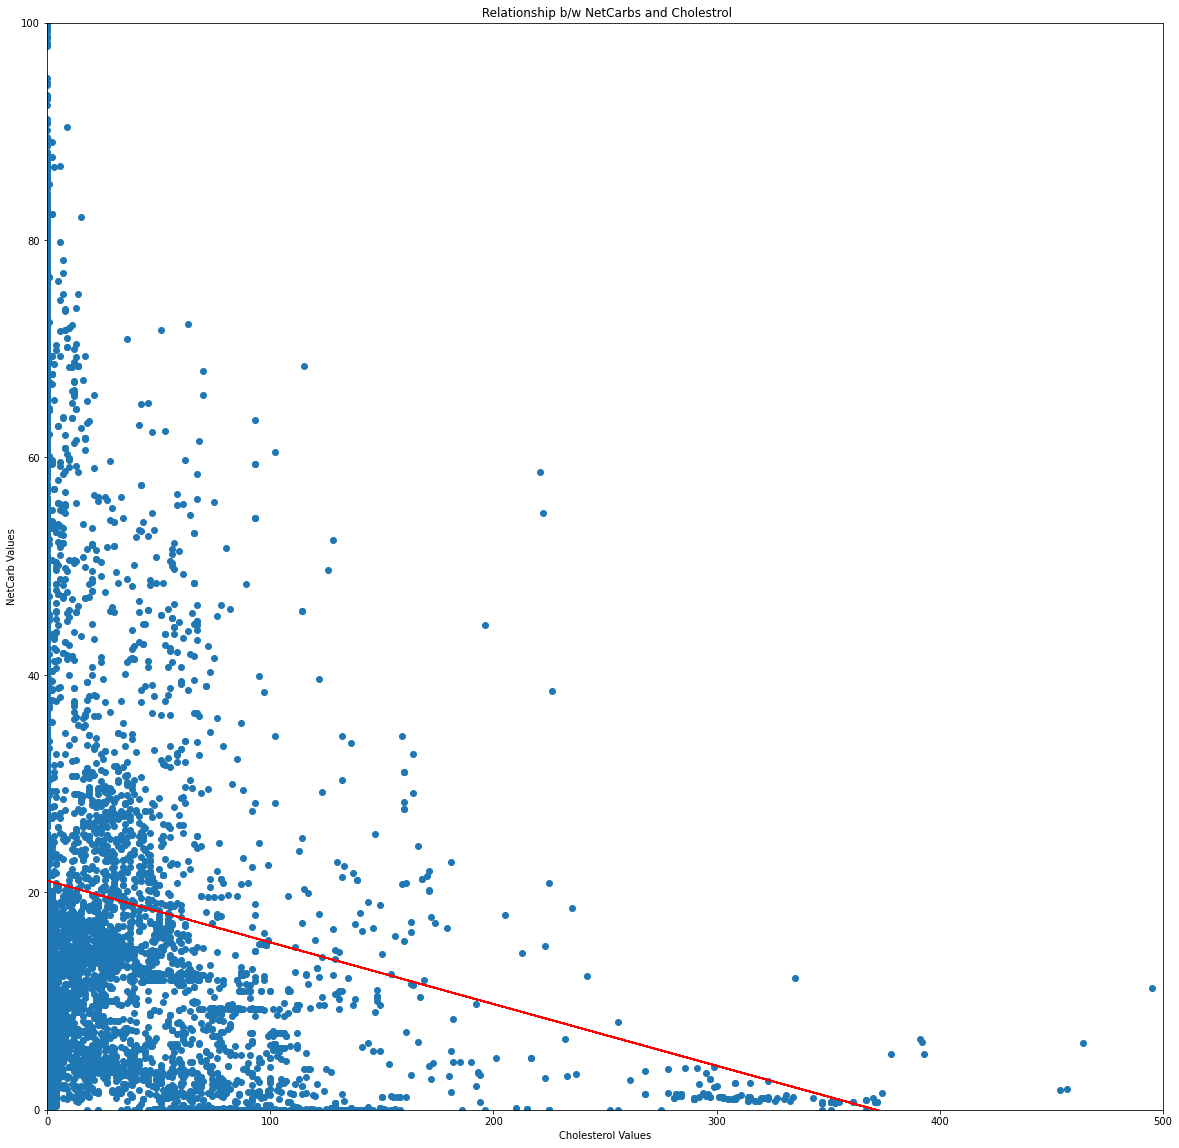

In [ ]:
# Imporing pylab
import pylab
plt.scatter(tmp['Data.Cholesterol'],tmp['NetCarbs']) # Plotting the scatter plot
plt.title(" Relationship b/w NetCarbs and Cholestrol") # Title fo the cplot
plt.ylabel("NetCarb Values") # Setting the ylabel
plt.xlabel("Cholesterol Values") # Setting the xlabel
plt.xlim([0,500])
plt.ylim([0,100])

a = np.polyfit(tmp['Data.Cholesterol'], tmp['NetCarbs'], 1) #Polyfit of the dataframe
b = np.poly1d(a)
pylab.plot(tmp['Data.Cholesterol'],b(tmp['Data.Cholesterol']),"r--")
print(tmp['NetCarbs'].corr(tmp['Data.Cholesterol']))

*   From the graph, we can observe that Netcarbs and Cholestrol is negatively correlated and the trendline is pointing downward
*    We can conclude that the NetCarbs are Cholesterol are inversely related.
*   But, they have a weak relationship because the correlation coefficient is only -0.21.

*   According to an article **[9]**, their cholesterol levels may be elevated for those on a ketogenic diet due to ingestion of very low-carbohydrate. But the report also pointed out that the impact of the ketogenic diet on cholesterol is not as significant as thought. Therefore, validating our above analysis, net carbs and cholesterol have a negative correlation, but there is no strong relationship.




### The lowest net carbs food vs the highest net carbs food

In [ ]:
#Min Value
tmp1 = tmp[tmp['NetCarbs']==tmp['NetCarbs'].min()]
tmp1['Category'].unique()

array(['Meat', 'Ground meat', 'Beef', 'Steak', 'Beef steak',
       'Corned beef', 'Beef brisket', 'Ground beef', 'Ground beef patty',
       'Pork', 'Pork chop', 'Ham', 'Pork roast', 'Salt pork', 'Fat back',
       'Pork ears', 'Pork skin rinds', 'Pork skin', 'Lamb', 'Lamb chop',
       'Lamb hocks', 'Goat', 'Goat ribs', 'Veal', 'Veal chop',
       'Veal cutlet or steak', 'Rabbit', 'Venison/deer',
       'Venison/deer steak', 'Deer chop', 'Venison/deer ribs', 'Moose',
       'Bear', 'Caribou', 'Bison', 'Ground hog', 'Opossum', 'Squirrel',
       'Beaver', 'Raccoon', 'Armadillo', 'Wild pig', 'Ostrich', 'Chicken',
       'Chicken breast', 'Chicken leg', 'Chicken drumstick',
       'Chicken thigh', 'Chicken wing', 'Chicken skin', 'Turkey', 'Duck',
       'Goose', 'Cornish game hen', 'Dove', 'Quail', 'Pheasant', 'Kidney',
       'Sweetbreads', 'Tongue', 'Tripe', 'Chitterlings', 'Hog maws',
       'Gizzard', 'Head cheese', 'Fish', 'Anchovy', 'Barracuda', 'Carp',
       'Catfish', 'Cod', 'C

In [ ]:
# Because there are too many "Categories", we take out categories with more than ten "Descriptions"
g1 = tmp1.groupby('Category')['Description'].nunique()
g1 = pd.DataFrame(g1)
g2 = g1[g1['Description'] > 10]
g2

,Description
Category,
Beef,22
Beef steak,12
Chicken,22
Chicken breast,16
Chicken drumstick,16
Chicken leg,12
Chicken thigh,16
Lamb,14
Pork,14


Which foods have the lowest net carbs?  What do these foods have in common.

*   The above tables are all categories with the lowest net carbs. And they have one thing in common. They are all meat.
*   According to an article **[8]** , low-carb foods include lean meats, such as sirloin, chicken breast, or pork, validating our analysis.








In [ ]:
#Max Value
tmp2 = tmp[tmp['NetCarbs']==tmp['NetCarbs'].max()]
tmp2

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
6429,Sugar substitute,"Sugar substitute, stevia, powder",91108000,0,0,0,100.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,100.0
6431,Sugar substitute,"Sugar substitute, monk fruit, powder",91108020,0,0,0,100.0,0,0.0,0.0,...,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,100.0


Which foods have the highest net carbs? What do these foods have in common.



*   The above table states that stevia and monkey fruit have the highest net carbs. And what they have in common is that they are all sugar substitutes.

*   According to an article **[11]**, people who follow a ketogenic diet have difficulty quitting sweets right away. So at the beginning of the ketogenic diet, it is acceptable to use a few sweeteners. And stevia and monkey fruit are on the list of keto-approved sweeteners in this article. That is to say, although the net carbs of stevia and monkey fruit are high, they are allowed in the initial ketogenic diet.




# Advanced EDA 


## **Item 1:** ***High Cholesterol Food Categories***

In [ ]:
Category_Cholesterol = df.groupby('Category')['Data.Cholesterol'].mean()
Category_Cholesterol = pd.DataFrame(Category_Cholesterol)

In [ ]:
Category_Cholesterol.reset_index(inplace=True)

In [ ]:
Category_Cholesterol.drop(Category_Cholesterol.index[Category_Cholesterol['Data.Cholesterol'] <= 100], inplace = True)

In [ ]:
print(Category_Cholesterol.head())

                             Category  Data.Cholesterol
3                             Abalone             127.0
6    Air filled fritter or fried puff             126.0
73             Bacon and egg sandwich             171.0
126                            Beaver             117.0
162                 Beef egg foo yung             185.0


No handles with labels found to put in legend.


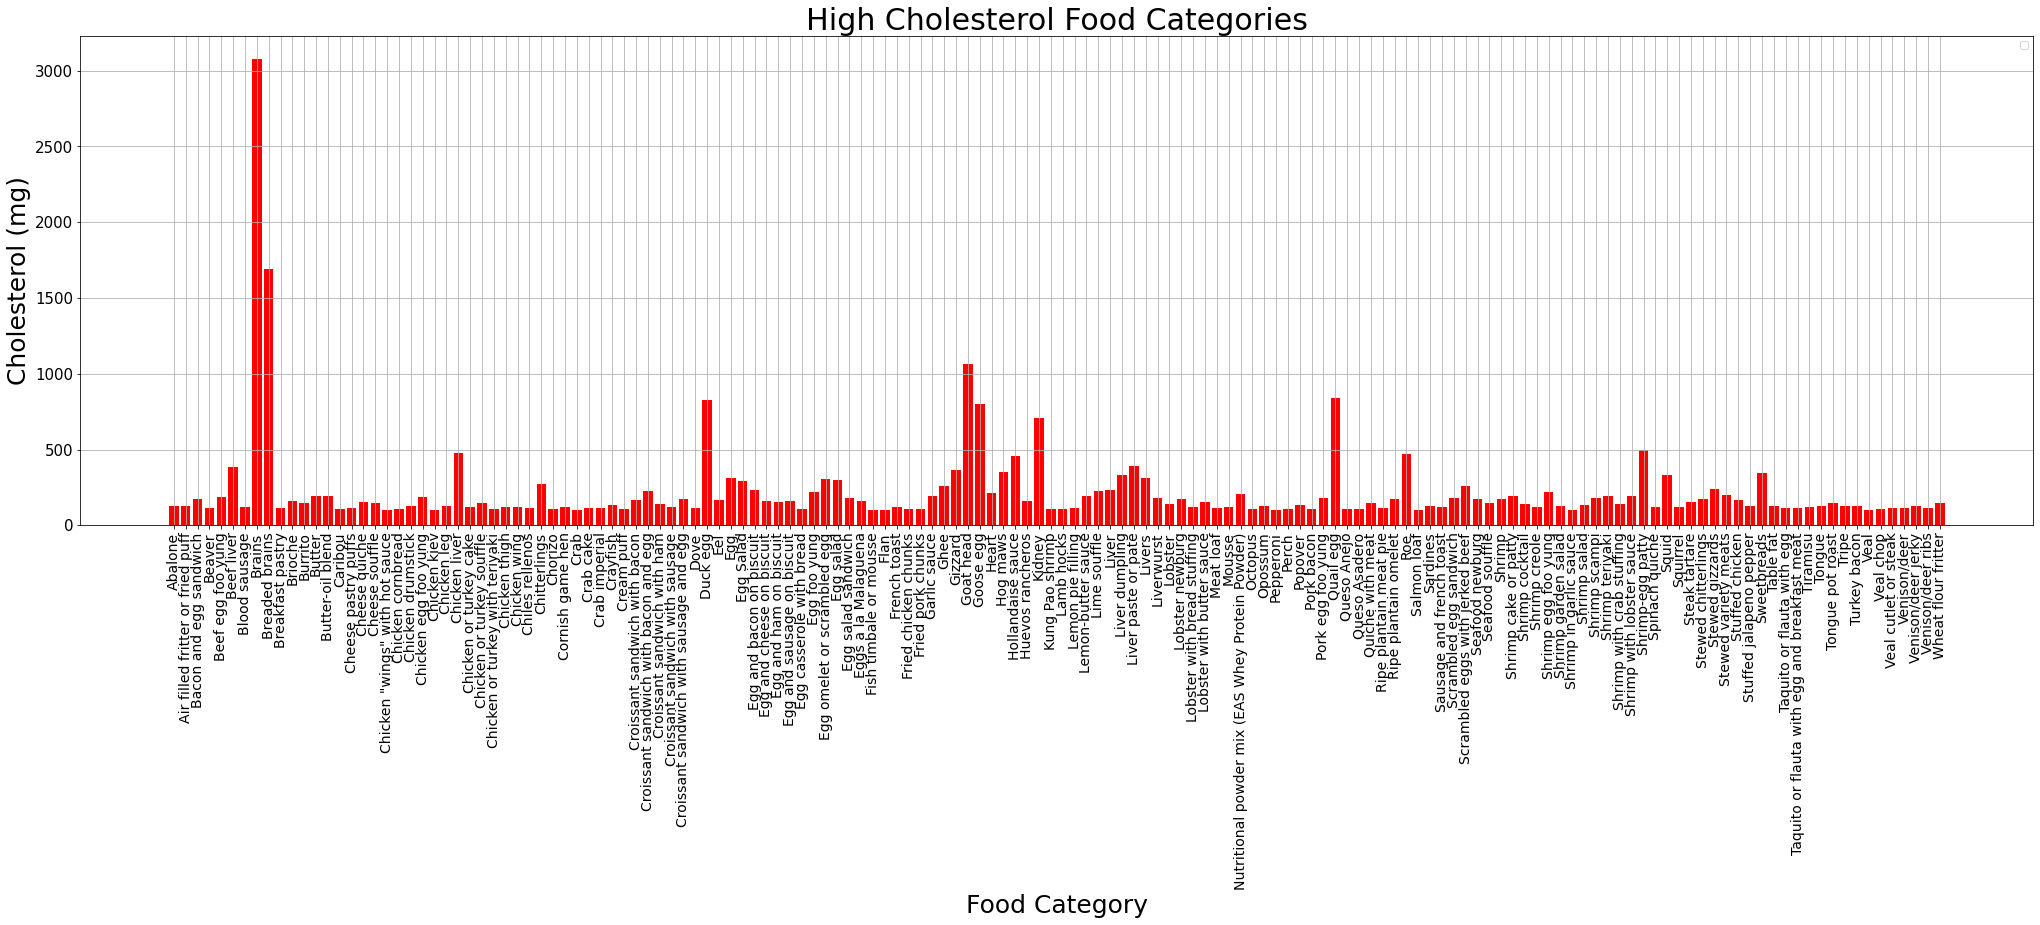

In [ ]:
plt.figure(figsize=[35,9])

plt.bar('Category',
        'Data.Cholesterol', 
         data=Category_Cholesterol,
         color='red')

plt.legend() # adding legend
plt.title('High Cholesterol Food Categories', fontsize=30) # adding title
plt.xlabel('Food Category', fontsize=25) # adding x-label
plt.ylabel('Cholesterol (mg)', fontsize=25) # adding y-label
plt.xticks(rotation = 90, fontsize=14)
plt.yticks(fontsize=15)
plt.grid()
plt.show()

#### Analysis



*   From the plot, we can observe that Brain and Breaded Brains have high cholesterol levels more than 1500 mg.
*   From the research, it is advised to consume products with cholesterol less than 500mg  inorder to have healthy and balanced nutrition diet.


*   The Brain item has 3074 mg of cholesterol and 1.74 netcarbs 






In [ ]:
Brains = df[df['Category'] =='Brains']

In [ ]:
# looking further into brains for insight to why cholesterol is so high in it
Brains

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,NetCarbs
1151,Brains,"Brains, cooked",25150000,0,69,0,1.47,3074,486.8,0.0,...,242,429,1.08,6,10.02,0.142,10.4,1.66,0.1,1.47


## **Item 2:** ***High Cholesterol Items and What They Have in Common***

#### Table

In [ ]:
counts = df['Category'].value_counts()

In [ ]:
# creating a dataset that represents more common food items than brains and random eggs
df2 = df[df['Category'].isin(counts[counts > 2].index)]
# df2['Category'].value_counts() # check

In [ ]:
Category_Breakdown = df2.groupby('Category')['Data.Cholesterol',
                                               'Data.Carbohydrate',
                                               'Data.Choline',
                                               'Data.Protein',
                                             'Data.Sugar Total',
                                             'Data.Fat.Monosaturated Fat',
                                             'Data.Fat.Polysaturated Fat',
                                             'Data.Fat.Saturated Fat', 
                                             'Data.Fat.Total Lipid',
                                             'Data.Fiber',
                                             'Data.Lutein and Zeaxanthin', 
                                             'Data.Lycopene',
                                             'Data.Niacin',].mean()
# Category_Breakdown # check

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
High_Cholesterol_Food_Categories = Category_Breakdown # Copy of table

In [ ]:
High_Cholesterol_Food_Categories.drop(High_Cholesterol_Food_Categories.index[High_Cholesterol_Food_Categories['Data.Cholesterol'] <= 105], inplace = True)
High_Cholesterol_Food_Categories.sort_values('Data.Cholesterol', ascending=False) #sorting values

,Data.Cholesterol,Data.Carbohydrate,Data.Choline,Data.Protein,Data.Sugar Total,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Fiber,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Niacin
Category,,,,,,,,,,,,,
Roe,473.000000,2.476667,412.100000,24.736667,0.013333,3.300667,4.954000,2.604000,11.980000,0.000000,354.666667,0.000000,1.373667
Squid,331.200000,7.864000,94.660000,22.656000,0.318000,0.995200,1.577700,0.850700,4.086000,0.180000,5.300000,0.000000,3.130900
Egg,308.926829,8.129024,201.131707,12.416585,1.610244,5.427951,2.797537,4.857780,14.299512,0.204878,361.048780,0.000000,1.016683
Egg omelet or scrambled egg,307.024390,1.295000,193.248780,12.157195,0.620122,4.862098,2.695146,4.593561,13.227561,0.130488,637.134146,61.634146,0.437439
Egg salad,298.250000,2.580000,235.400000,10.098750,1.942500,4.614500,4.651125,3.521750,14.507500,0.000000,284.250000,0.500000,0.056875
Butter-oil blend,192.750000,0.015000,17.325000,1.282500,0.045000,19.174000,2.937750,44.117250,73.202500,0.000000,6.500000,0.000000,0.026500
Butter,190.250000,0.030000,17.325000,1.372500,0.045000,19.460750,2.865750,45.611750,73.905000,0.000000,3.250000,0.000000,0.031500
Shrimp,172.250000,8.228500,96.635000,17.644500,0.609000,1.599500,1.882850,1.416700,5.510000,0.415000,16.250000,0.000000,2.100000
Eel,167.000000,3.113333,88.500000,23.530000,0.023333,10.204333,2.454333,3.412333,17.640000,0.100000,17.000000,0.000000,4.306333


In [ ]:
tmp = df[["Category","Description", "Data.Cholesterol"]]
tmp.nlargest(10,"Data.Cholesterol")

,Category,Description,Data.Cholesterol
1151,Brains,"Brains, cooked",3074
1913,Breaded brains,"Breaded brains, Puerto Rican style",1691
2693,Egg,"Egg, yolk only, raw",1085
2695,Egg,"Egg, yolk only, cooked, no added fat",1082
851,Goat head,"Goat head, cooked",1064
2694,Egg,"Egg, yolk only, cooked, NS as to fat",1015
2696,Egg,"Egg, yolk only, cooked, fat added",1015
1584,Squid,"Squid, dried",882
2699,Quail egg,"Quail egg, canned",841
2697,Duck egg,"Duck egg, cooked",828




*   The products listed above should be avoided as they have high cholesterol content when compared to others.


*   Cholesterol levels are higher in egg-based goods.


*   One of the similarities discovered during the study is that meat products have a high cholesterol content.







## **Item 3:** ***Correlation of Nutrients and Cholesterol***

In [ ]:
Category_Breakdown.drop(Category_Breakdown.index[Category_Breakdown['Data.Cholesterol'] <= 10], inplace = True) #Cholesterol less than 10

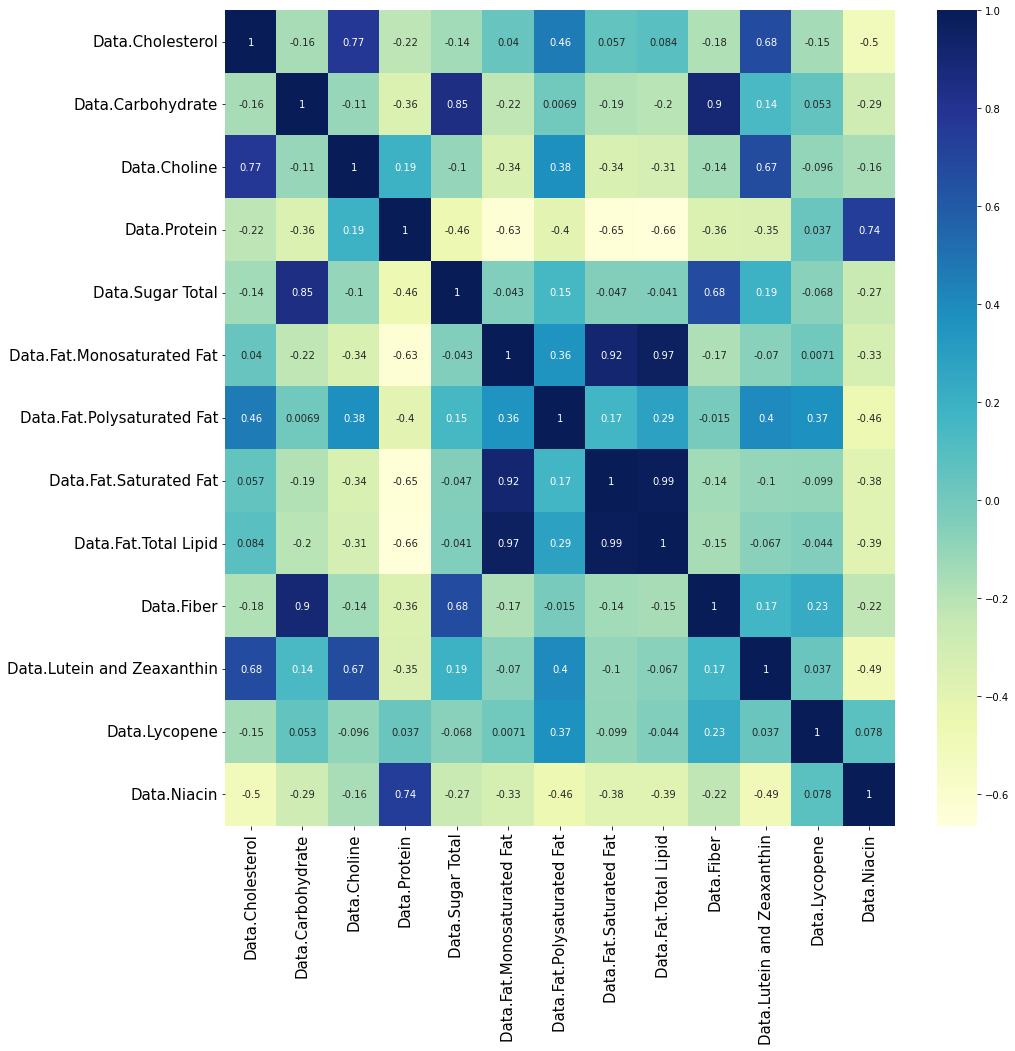

In [ ]:
figsize(15,15)
# Correlation matrix
corr = Category_Breakdown.corr()
#heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot = True, cmap="YlGnBu")
# xlabel
plt.xticks(rotation = 90, fontsize=15)
# Ylabel
plt.yticks(fontsize=15)
#Plotting
plt.show()



*   From the study and analysis, Unstaurated fats and Total lipids are highly correlated.




## **Item 4:** ***Choline / Lutein-Zeaxanthin / Polysaturated Fat and Cholesterol***

In [ ]:
Cholesterol = df[df['Data.Cholesterol'] >=500]
Cholesterol.drop(['Nutrient Data Bank Number', 'NetCarbs'], axis = 1)

,Category,Description,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Lutein and Zeaxanthin,...,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
851,Goat head,"Goat head, cooked",0,23,0,0.48,1064,231.3,0.0,0,...,243,349,415,3.86,2,4.10,0.047,3.4,0.77,0.8
1145,Chicken liver,"Chicken liver, braised",11,30,11,0.86,558,287.6,0.0,82,...,402,261,398,3.95,3948,16.71,0.749,27.7,0.81,0.0
1149,Kidney,"Kidney, cooked",0,0,0,0.00,710,508.9,0.0,0,...,301,134,416,2.82,0,24.69,0.388,0.0,0.08,0.0
1151,Brains,"Brains, cooked",0,69,0,1.47,3074,486.8,0.0,0,...,332,242,429,1.08,6,10.02,0.142,10.4,1.66,0.1
1576,Roe,"Roe, sturgeon",0,0,0,4.00,588,490.9,0.0,648,...,356,181,1500,0.95,271,20.00,0.320,0.0,1.89,0.6
1584,Squid,"Squid, dried",0,0,0,11.65,882,245.9,0.0,0,...,836,931,899,5.79,32,4.67,0.201,16.9,4.54,0.0
1657,Shrimp,"Shrimp, dried",0,0,0,0.00,638,204.8,0.0,0,...,494,203,2203,4.96,0,1.87,0.025,10.4,2.78,0.0
1913,Breaded brains,"Breaded brains, Puerto Rican style",0,40,1,17.35,1691,284.9,0.5,29,...,249,217,318,0.94,23,5.63,0.114,6.3,2.01,0.4
2693,Egg,"Egg, yolk only, raw",38,88,33,3.59,1085,820.2,0.0,1094,...,390,109,48,2.30,381,1.95,0.350,0.0,2.58,0.7
2694,Egg,"Egg, yolk only, cooked, NS as to fat",35,93,31,3.36,1015,612.0,0.0,1020,...,364,102,175,2.14,379,1.46,0.347,0.0,3.07,5.9


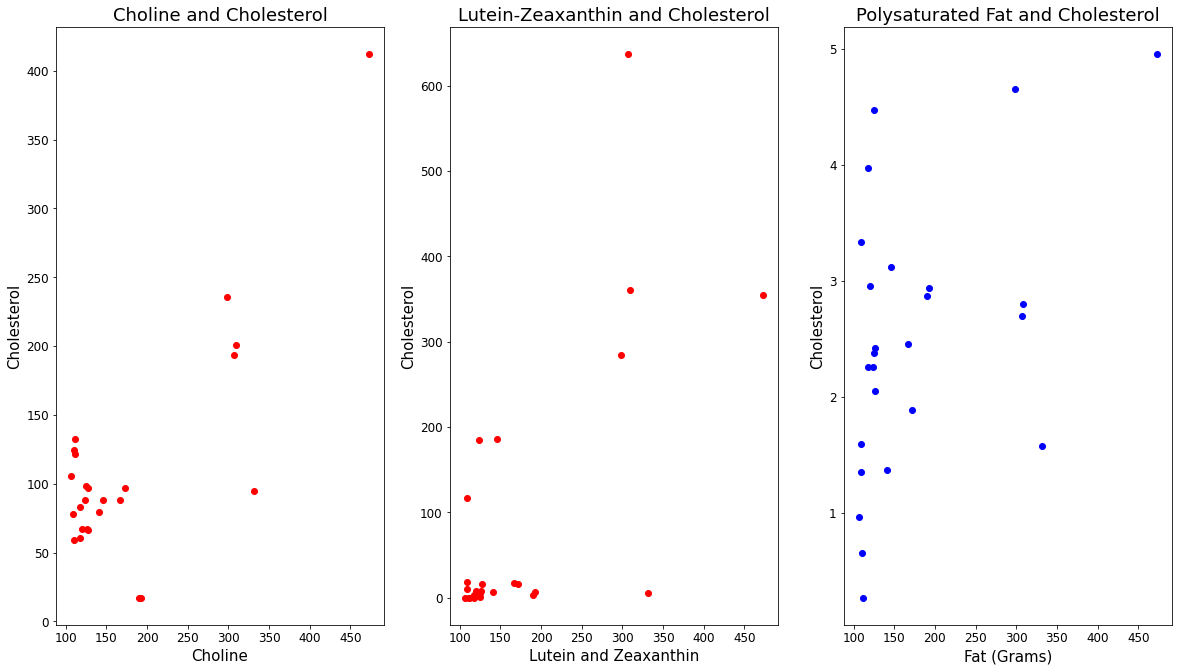

In [ ]:
plt.figure(figsize=[20,11])

plt.subplot(1, 3, 1)
plt.scatter(Category_Breakdown['Data.Cholesterol'], Category_Breakdown['Data.Choline'], color="red")
plt.title('Choline and Cholesterol',fontsize=18) # adding title
plt.xlabel('Choline', fontsize=15) # adding x-label
plt.ylabel('Cholesterol', fontsize=15) # adding y-label
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 3, 2)
plt.scatter(Category_Breakdown['Data.Cholesterol'], Category_Breakdown['Data.Lutein and Zeaxanthin'], color="red")
plt.title('Lutein-Zeaxanthin and Cholesterol',fontsize=18)
plt.xlabel('Lutein and Zeaxanthin', fontsize=15)
plt.ylabel('Cholesterol', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 3, 3)
plt.scatter(Category_Breakdown['Data.Cholesterol'], Category_Breakdown['Data.Fat.Polysaturated Fat'], color="blue")
plt.title('Polysaturated Fat and Cholesterol', fontsize=18)
plt.ylabel('Cholesterol', fontsize=15)
plt.xlabel('Fat (Grams)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

*   According to the above table, a large part of the items with high cholesterol are different kinds of eggs. Therefore, several of the components of the eggs we use are compared with cholesterol individually.

*   The results are shown above after comparing Choline, Lutein-Zeaxanthin, and Polysaturated Fat with Cholesterol individually. The results showed that Lutein-Zeaxanthin had a higher effect on cholesterol.

*   That is, in a variety of egg types, if we want to eat low-cholesterol eggs. For example, we may eat eggs with less Lutein-Zeaxanthin to reduce cholesterol intake.








## **Item 5:** ***Monosaturated Fat / Polysaturated Fat / Saturated Fat / Total Lipid***

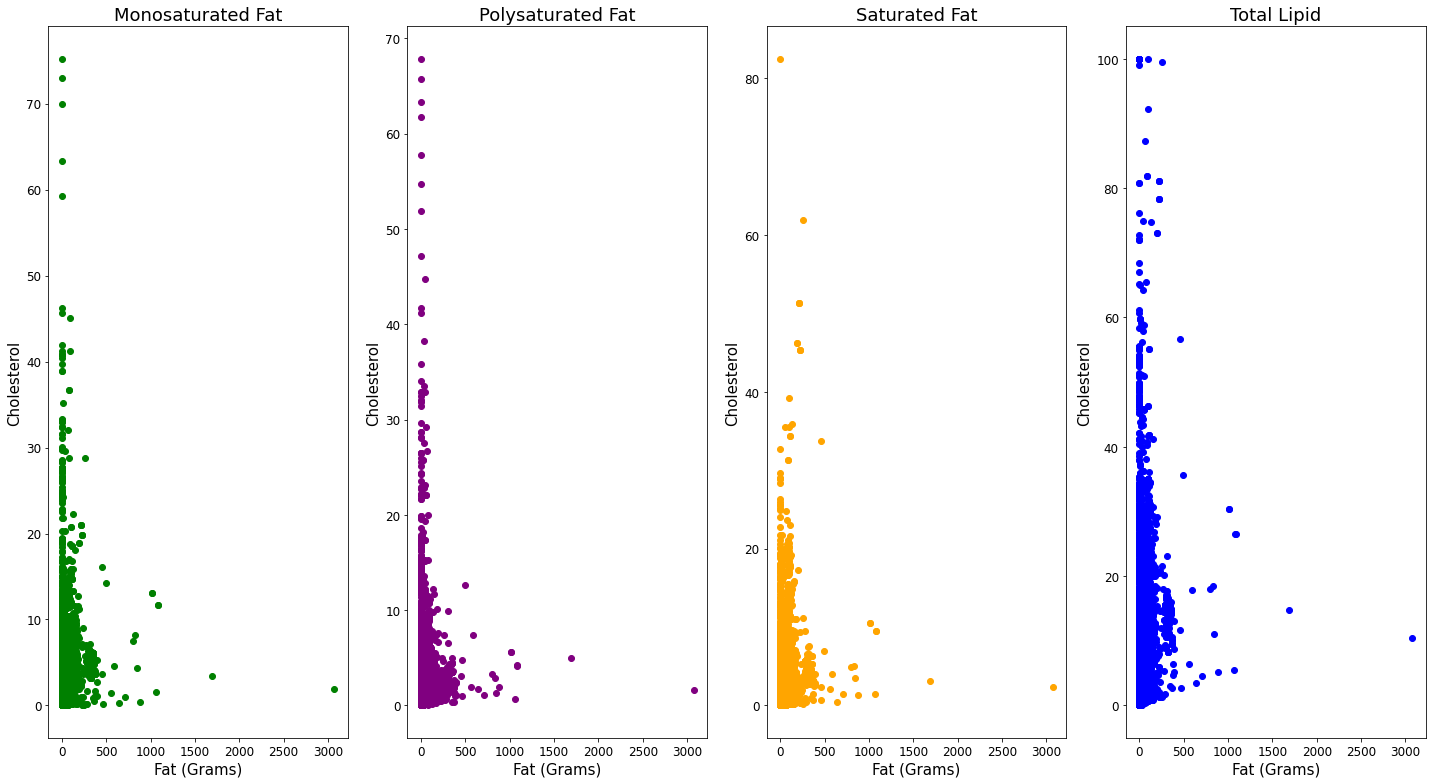

In [ ]:
plt.figure(figsize=[20,11])

plt.subplot(1, 4, 1) # setting plot location
plt.scatter(df['Data.Cholesterol'], df['Data.Fat.Monosaturated Fat'], color="green") # selecting data and color for line
plt.title('Monosaturated Fat', fontsize=18) # setting title
plt.ylabel('Cholesterol', fontsize=15) # adding y label
plt.xlabel('Fat (Grams)', fontsize=15) # adding x label
plt.xticks(fontsize=12) # setting x axis tick font size
plt.yticks(fontsize=12) # setting y axis tick font size

plt.subplot(1, 4, 2)
plt.scatter(df['Data.Cholesterol'], df['Data.Fat.Polysaturated Fat'], color="purple")
plt.title('Polysaturated Fat', fontsize=18)
plt.ylabel('Cholesterol', fontsize=15)
plt.xlabel('Fat (Grams)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 4, 3)
plt.scatter(df['Data.Cholesterol'], df['Data.Fat.Saturated Fat'], color="orange")
plt.title('Saturated Fat', fontsize=18)
plt.ylabel('Cholesterol', fontsize=15)
plt.xlabel('Fat (Grams)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(1, 4, 4)
plt.scatter(df['Data.Cholesterol'], df['Data.Fat.Total Lipid'], color="blue")
plt.title('Total Lipid', fontsize=18)
plt.ylabel('Cholesterol', fontsize=15)
plt.xlabel('Fat (Grams)', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

*   The plot above shows the results of individual comparisons using different types of fat and cholesterol.

*   And the plot shows that saturated fat has higher cholesterol than other fat types.

*   That is to say, if we want to consume lower cholesterol, we should pay attention to the saturated fat content of food ingredients.

*   A report[6] also pointed out that we should also look at saturated fat numbers when checking cholesterol numbers. This is because saturated fat has a more significant impact on cholesterol levels than we think.



# Data Splitting 
Using an 80/10/10 split for train, test and validation.


## Data Splitting for Regression Models

In [ ]:
# the target variable is y1
y1 = df_shuffled['Data.Cholesterol']
print(y1.shape)
# everything else is X1 and drop we don't need 
X1 = df_shuffled.drop(['Description', 'Nutrient Data Bank Number', 'Data.Cholesterol'], axis=1)
print(X1.shape)

(6375,)
(6375, 35)


In [ ]:
# split the data
# use an 80/10/10 split for train, test and validation
from sklearn.model_selection import train_test_split
X1_train, X1_val, y1_train, y1_val = train_test_split(X1, y1,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 12)
# Splitting the data on val data
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_val, y1_val,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 12)

In [ ]:
# create the metadata columns
X1_train_meta = X1_train
X1_test_meta = X1_test
X1_val_meta = X1_val

# drop "Category"
X1_train = X1_train.drop(['Category'], axis=1)
X1_test = X1_test.drop(['Category'], axis=1)
X1_val = X1_val.drop(['Category'], axis=1)

In [ ]:
# check the shape
print(X1_train.shape, X1_test.shape, X1_val.shape, y1_train.shape, y1_test.shape, y1_val.shape)

(5100, 34) (637, 34) (638, 34) (5100,) (637,) (638,)


In [ ]:
# convert these all to numpy arrays
X1_train = np.array(X1_train) #train
X1_test = np.array(X1_test) #test
X1_val = np.array(X1_val) #val
y1_train = np.array(y1_train) #train
y1_test = np.array(y1_test) # test
y1_val = np.array(y1_val) #val

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# ensure all of X data is between 0 (min) and 1 (max)
scaler = MinMaxScaler()
X1_train = scaler.fit_transform(X1_train) # Fitting the values
X1_test = scaler.transform(X1_test)
X1_val = scaler.transform(X1_val)

## Data Splitting for Classification Models

In [ ]:
# we want to predict if Data.Cholesterol is greater than the median
df_shuffled_2 = df_shuffled
df_shuffled_2['Cholesterol.Madian'] = np.where(df_shuffled_2['Data.Cholesterol'] <= np.median(df_shuffled_2['Data.Cholesterol']), 0, 1)

In [ ]:
# the target variable is y2
y2 = df_shuffled_2['Cholesterol.Madian']
print(y2.shape)
# everything else is X2 and drop we don't need 
X2 = df_shuffled_2.drop(['Category', 'Description', 'Nutrient Data Bank Number', 'Data.Cholesterol','Cholesterol.Madian'], axis=1)
print(X2.shape)

(6375,)
(6375, 34)


In [ ]:
# split the data
# use an 80/10/10 split for train, test and validation
X2_train, X2_val, y2_train, y2_val = train_test_split(X2, y2,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 12)
X2_test, X2_val, y2_test, y2_val = train_test_split(X2_val, y2_val,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 12)

In [ ]:
# check the shape
print(X2_train.shape, X2_test.shape, X2_val.shape, y2_train.shape, y2_test.shape, y2_val.shape)

(5100, 34) (637, 34) (638, 34) (5100,) (637,) (638,)


In [ ]:
# convert these all to numpy arrays
X2_train = np.array(X2_train) # train
X2_test = np.array(X2_test) #test
X2_val = np.array(X2_val) #val
y2_train = np.array(y2_train) #train
y2_test = np.array(y2_test) #test
y2_val = np.array(y2_val) #val

In [ ]:
# ensure all of X data is between 0 (min) and 1 (max)
scaler = MinMaxScaler()
X2_train = scaler.fit_transform(X2_train) #Fitting the values
X2_test = scaler.transform(X2_test)
X2_val = scaler.transform(X2_val)

# Modeling (Regression) 
 Predicting Cholesterol from the other nutrition variables

1. Model1: Fit a very basic linear regression model (vanilla)
2. Model2: Using all of pre-processing and advanced modeling techniques to build an amazing model. 
3. Model3: drop any records where cholesterol is equal to 0. 
4. Model4: drop any records where cholesterol is equal to 0.

## Model 1 (Linear Regression)

In [ ]:
# Importing linear Regression
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
# Fitting Linear Regression
LR = LR.fit(X1_train, y1_train)
# Storing Predictors
train_preds = LR.predict(X1_train) 
test_preds = LR.predict(X1_test)
Val_preds = LR.predict(X1_val)
LR.score(X1_train, y1_train) #r2 score

0.6405063943170917

The Linear regression model shows a r2 score 0.64 while predicting using other nutrition variables

## Model 2 


### Polyomial Features and interaction terms

In [ ]:
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(2) # you square it, raise to second power
X1 = df_shuffled.drop(['Category', 'Description', 'Nutrient Data Bank Number', 'Data.Cholesterol'], axis=1)
X1 = poly.fit_transform(X1) # Fitting the values
print(X1.shape) # check the shape

(6375, 666)


In [ ]:
Xp = pd.DataFrame(X1)
Xp['Category'] = df_shuffled['Category']
print(Xp.shape)

(6375, 667)


In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data for polynomial features
X1_train_poly, X1_val_poly, y1_train_poly, y1_val_poly = train_test_split(Xp, y1,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 12)
# Splitting the data on val data
X1_test_poly, X1_val_poly, y1_test_poly, y1_val_poly = train_test_split(X1_val_poly, y1_val_poly,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 12)

In [ ]:
# create the metadata columns
X2_train_meta = X1_train_poly
X2_test_meta = X1_test_poly
X2_val_meta = X1_val_poly

# drop "Category"
X1_train_poly = X1_train_poly.drop(['Category'], axis=1)
X1_test_poly = X1_test_poly.drop(['Category'], axis=1)
X1_val_poly = X1_val_poly.drop(['Category'], axis=1)

In [ ]:
print(X1_train_poly.shape,X1_test_poly.shape, X1_val_poly.shape,y1_train_poly.shape,y1_test_poly.shape, y1_val_poly.shape)

(5100, 666) (637, 666) (638, 666) (5100,) (637,) (638,)


In [ ]:
# convert these all to numpy arrays
X1_train_poly = np.array(X1_train_poly)
X1p_test_poly = np.array(X1_test_poly)
X1_val_poly = np.array(X1_val_poly)
y1_train_poly = np.array(y1_train_poly)
y1_test_poly = np.array(y1_test_poly)
y1_val_poly = np.array(y1_val_poly)

In [ ]:
scaler = MinMaxScaler() # Scaling the values between 0 and 1
X_train_poly = scaler.fit_transform(X1_train_poly) #Fitting the values
X_test_poly = scaler.transform(X1p_test_poly)
X_val_poly = scaler.transform(X1_val_poly)

### PCA

In [ ]:
#Importing modules from sklearn.decomposition
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) #PCA
X_train_pca = pca.fit_transform(X_train_poly)

In [ ]:
X_train_pca = pd.DataFrame(X_train_pca)
print(X_train_pca.shape) # check the shape
X_train_pca.head()

(5100, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.904123,-0.639866,0.181872,0.116535,0.538811,0.088953,-0.004459,0.037230,-0.144870,-0.018140,...,0.030991,-0.055438,0.030031,-0.027074,0.032817,0.022123,-0.015573,-0.019994,-0.002326,0.000543
1,0.654358,-0.181903,-0.574944,0.244496,0.072602,0.167021,-0.231170,0.158291,-0.281931,0.044541,...,-0.009531,-0.049624,0.023107,-0.015584,-0.011568,-0.042095,-0.002196,0.027112,0.003820,-0.013684
2,0.818385,0.068556,-0.182189,0.007242,0.084086,0.177708,-0.018324,-0.073701,0.003056,0.086007,...,0.045813,0.035355,0.005241,-0.014611,0.024103,0.060084,-0.004304,-0.030254,-0.029614,0.043570
3,-0.848497,-0.646150,0.188189,-0.009936,0.171974,-0.015672,-0.014178,0.127738,-0.067134,-0.041816,...,0.003096,-0.014818,0.018310,0.046190,0.019648,0.013361,-0.008640,0.027120,0.021928,-0.020497
4,-0.950866,0.634199,-0.434929,0.263326,-0.196865,-0.471850,0.258795,-0.205809,0.242744,-0.017108,...,-0.004922,-0.050399,0.032325,-0.066230,0.048795,0.057965,-0.056025,-0.049862,0.028531,-0.016431


In [ ]:
X_test_pca = pca.transform(X_test_poly) # Transform test

In [ ]:
X_test_pca = pd.DataFrame(X_test_pca)
print(X_test_pca.shape) # Check the shape
X_test_pca.head()

(637, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.743007,0.598877,-0.194426,0.041121,0.052272,0.124841,-0.172250,-0.255137,-0.069440,0.079146,...,-0.001875,0.058262,0.027286,0.053759,-0.002125,0.004835,0.050533,-0.022047,-0.005935,0.030155
1,-0.794055,-0.536793,0.123979,-0.138476,-0.018722,0.036959,-0.021633,0.132161,0.096995,-0.032391,...,-0.004740,0.013794,-0.008970,0.015419,-0.015357,0.017565,-0.003440,-0.012984,-0.014121,0.011904
2,0.717223,0.342263,-0.334771,0.065633,0.150528,0.186197,-0.066094,-0.191184,-0.090714,0.233738,...,0.042009,0.068585,0.008924,0.049041,0.001667,0.083403,0.019643,-0.041686,-0.022351,0.052535
3,-0.833096,-0.676152,0.114460,-0.130141,-0.134894,-0.089319,-0.047145,0.340461,-0.010634,-0.098366,...,0.006914,0.008918,0.004780,-0.013031,-0.006086,0.002666,0.009967,0.003475,0.000548,0.008503
4,-0.830131,-0.477556,-0.016401,-0.040238,-0.122147,0.045861,-0.058891,-0.018291,-0.052932,0.032386,...,-0.022946,-0.018602,-0.010700,-0.034316,0.014108,-0.020079,0.030025,-0.033797,-0.022337,0.013344


In [ ]:
X_val_pca = pca.transform(X_val_poly) # Transform val

In [ ]:
X_val_pca = pd.DataFrame(X_val_pca)
print(X_val_pca.shape) # Check the shape
X_val_pca.head()

(638, 65)


,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,-0.724406,-0.365418,0.198219,-0.276708,0.099789,0.005812,-0.117478,0.006991,0.347618,0.115995,...,0.006412,-0.003263,-0.007858,0.016101,0.018358,0.036584,-0.117869,0.011069,-0.012014,0.061150
1,-0.826805,-0.722042,0.171121,-0.157591,-0.137458,-0.129920,-0.022424,0.416803,0.013749,-0.104222,...,0.004730,0.010758,0.002998,-0.004915,-0.010291,0.006227,0.004499,0.019645,0.004233,-0.003978
2,-0.795058,-0.424175,0.186947,0.085923,0.164714,-0.071391,-0.034878,-0.142190,-0.108808,-0.100418,...,0.039754,0.045353,-0.005943,0.020451,-0.001964,-0.032740,0.056486,-0.018854,-0.022156,-0.003630
3,-0.805404,-0.606574,0.150549,-0.123762,-0.033040,-0.048868,-0.060230,0.176705,0.039194,-0.038194,...,0.007299,-0.003627,0.018540,0.024031,0.008076,-0.002250,-0.011618,0.024526,0.009405,-0.008244
4,-0.894412,1.129971,-0.075196,-0.497590,0.207026,-0.162384,0.430550,0.124428,-0.012580,0.245297,...,-0.028269,-0.052992,0.032784,0.064157,-0.008469,0.031935,-0.073965,-0.098918,-0.063414,-0.027724


In [ ]:
y_train_pca = y1_train #train
y_test_pca = y1_test #test
y_val_pca = y1_val # val

In [ ]:
print(y_train_pca.shape,y_test_pca.shape,y_val_pca.shape  ) # check the shape

(5100,) (637,) (638,)


In [ ]:
## CLF POLY
clf_poly = LinearRegression() #Linear regression
clf_poly = clf_poly.fit(X_train_poly, y1_train_poly) #polyfit

# store the predictions
train_preds_poly = clf_poly.predict(X_train_poly) # train
test_preds_poly = clf_poly.predict(X_test_poly) # test
val_preds_poly = clf_poly.predict(X_val_poly) # val
clf_poly.score(X_train_poly, y1_train_poly)

0.9555154967759878

In [ ]:
# now the pca model
clf_pca = LinearRegression() #Linear regression
clf_pca = clf_pca.fit(X_train_pca, y1_train) #pca

# store the predictions
train_preds_pca = clf_pca.predict(X_train_pca) # train
test_preds_pca = clf_pca.predict(X_test_pca) # test
val_preds_pca = clf_pca.predict(X_val_pca) # val
clf_pca.score(X_train_pca, y1_train)

0.6294833751723573

 


*  The model with polynomial features has better R2 when compared to other models with a 0.95 score




## Model 3 
Linear Regression when all the cholestrol with 0 values are dropped

In [ ]:
y_1c = df_shuffled #making a copy
y_1c.drop(y_1c.loc[y_1c['Data.Cholesterol'] == 0].index, inplace = True) # dropping 0 values
# df.drop(df.loc[df['line_race']==0].index, inplace=True)
print(y_1c.shape) # check the shape

(4171, 39)


In [ ]:
y13 = y_1c['Data.Cholesterol']
print(y13.shape) # check the shape
X13 = y_1c.drop(['Description', 'Nutrient Data Bank Number', 'Data.Cholesterol'], axis=1)
print(X13.shape) #check the shape

(4171,)
(4171, 36)


In [ ]:
from sklearn.model_selection import train_test_split
# splitting the data
X13_train, X13_val, y13_train, y13_val = train_test_split(X13, y13,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 12)
# splitting the val data
X13_test, X13_val, y13_test, y13_val = train_test_split(X13_val, y13_val,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 12)

In [ ]:
# create the metadata columns
X3_train_meta = X13_train
X3_test_meta = X13_test
X3_val_meta = X13_val

# drop "Category"
X13_train = X13_train.drop(['Category'], axis=1)
X13_test = X13_test.drop(['Category'], axis=1)
X13_val = X13_val.drop(['Category'], axis=1)

In [ ]:
print(X13_train.shape, X13_test.shape, X13_val.shape, y13_train.shape, y13_test.shape, y13_val.shape) #check the shape

(3336, 35) (417, 35) (418, 35) (3336,) (417,) (418,)


In [ ]:
# Converting to numpy arrays
X13_train = np.array(X13_train) 
X13_test = np.array(X13_test)
X13_val = np.array(X13_val)
y13_train = np.array(y13_train)
y13_test = np.array(y13_test)
y13_val = np.array(y13_val)

In [ ]:
# Importing MinMax Scaler
from sklearn.preprocessing import  MinMaxScaler
scaler = MinMaxScaler()
X13_train = scaler.fit_transform(X13_train) #Fitting data
X13_test = scaler.transform(X13_test)
X13_val = scaler.transform(X13_val)

In [ ]:
# Importing linear Regression
from sklearn.linear_model import LinearRegression
LR13 = LinearRegression()
# Fitting Linear Regression
LR13 = LR.fit(X13_train, y13_train)
# Storing Predictions
train_preds13 = LR.predict(X13_train)
test_preds13 = LR.predict(X13_test)
Val_preds13 = LR.predict(X13_val)
LR13.score(X13_train, y13_train)

0.6642210409170164

After removing the cholesterol values from the dataframe, the model has improved by 2% when compared to model 1

## Model 4


### Polyomial Features and interaction terms



*   In this model we'll be using same Xp dataframe used in Model 2 but we have to change the y dataframe.
*   We are dropping the cholesterol 



In [ ]:
poly = PolynomialFeatures(2) # you square it, raise to second power
X13 = y_1c.drop(['Category', 'Description', 'Nutrient Data Bank Number', 'Data.Cholesterol'], axis=1)
X1_3 = poly.fit_transform(X13)
print(X1_3.shape)

(4171, 666)


In [ ]:
Xp13 = pd.DataFrame(X1_3)
Xp13['Category'] = df_shuffled['Category']
print(Xp13.shape)

(4171, 667)


In [ ]:
#Importing the modules
from sklearn.model_selection import train_test_split
#Splitting the data
X14_train_poly, X14_val_poly, y14_train_poly, y14_val_poly = train_test_split(Xp13, y13,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 12)
# Splitting the data on val data
X14_test_poly, X14_val_poly, y14_test_poly, y14_val_poly = train_test_split(X14_val_poly, y14_val_poly,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 12)

In [ ]:
# create the metadata columns
X4_train_meta = X14_train_poly #train
X4_test_meta = X14_test_poly # test
X4_val_meta = X14_val_poly # val

# drop "Category"
X14_train_poly = X14_train_poly.drop(['Category'], axis=1)
X14_test_poly = X14_test_poly.drop(['Category'], axis=1)
X14_val_poly = X14_val_poly.drop(['Category'], axis=1)

In [ ]:
print(X14_train_poly.shape,X14_test_poly.shape, X14_val_poly.shape,y14_train_poly.shape,y14_test_poly.shape, y14_val_poly.shape) #Check the shape

(3336, 666) (417, 666) (418, 666) (3336,) (417,) (418,)


In [ ]:
# convert these all to numpy arrays
X14_train_poly = np.array(X14_train_poly)
X14_test_poly = np.array(X14_test_poly)
X14_val_poly = np.array(X14_val_poly)
y14_train_poly = np.array(y14_train_poly)
y14_test_poly = np.array(y14_test_poly)
y14_val_poly = np.array(y14_val_poly)

In [ ]:
scaler = MinMaxScaler() # Scaling the values between 0 and 1
X14_train_poly = scaler.fit_transform(X14_train_poly) # fitting the values
X14_test_poly = scaler.transform(X14_test_poly) # Transforming data
X14_val_poly = scaler.transform(X14_val_poly)

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) # this means keep components that maintain 95% of the variance (Can choose an number between 0.8 and 0.999)
X14_train_pca = pca.fit_transform(X14_train_poly)

In [ ]:
X14_train_pca = pd.DataFrame(X14_train_pca) #Transform into dataframe

In [ ]:
X14_test_pca = pca.transform(X14_test_poly) 
X14_test_pca = pd.DataFrame(X14_test_pca) # For Test data

In [ ]:
X14_val_pca = pca.transform(X14_val_poly) # For val data
X14_val_pca = pd.DataFrame(X14_val_pca) 

In [ ]:
y14_train_pca = y13_train #train
y14_test_pca = y13_test # test
y14_val_pca = y13_val # val

In [ ]:
print(y14_train_pca.shape,y14_test_pca.shape,y14_val_pca.shape) # Shape

(3336,) (417,) (418,)


In [ ]:
## CLF POLY
clf_poly14 = LinearRegression()
clf_poly14 = clf_poly14.fit(X14_train_poly, y14_train_poly)

# store the predictions
train14_preds_poly = clf_poly14.predict(X14_train_poly) # train
test14_preds_poly = clf_poly14.predict(X14_test_poly) # test
val14_preds_poly = clf_poly14.predict(X14_val_poly) # val
clf_poly14.score(X14_train_poly, y14_train_poly) # quick peak at R2 on train

0.9781115711996726

In [ ]:
# now the pca model
clf_pca14 = LinearRegression()
clf_pca14 = clf_pca.fit(X14_train_pca, y13_train)

# store the predictions
train14_preds_pca = clf_pca.predict(X14_train_pca) # train
test14_preds_pca = clf_pca.predict(X14_test_pca) # test
val14_preds_pca = clf_pca.predict(X14_val_pca) # val
clf_pca14.score(X14_train_pca, y13_train)

0.6267965351336953


*  The Linear Regression model generated an r2 score of 0.66  after excluding the cholesterol 0 values.
*   When polynomial features are added to the dataframe, the model produces an r2 score of 0.97

* The Linear regression model produces an r2 of 0.62 after implementing principal component analysis






# Analyze and interpret regression errors 


**Advanced...** 

* Which food categories or items does the model have the most trouble predicting? Does your model tend to overestimate or underestimate?
* Which food categories or item does your model make a negative prediction for? 

* Write a few bullets below each item describing what's going on. Don't just make tables/plots and assume someone will understand - show the value of what you did! 

## Error Metrics

#### Model 1

##### Error Metric

In [ ]:
#importing modules for regression errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
# Calculate MAE, MSE, and R2 for train and test results.
Train_MAE = mean_absolute_error(y1_train, train_preds) #train
Test_MAE = mean_absolute_error(y1_test,test_preds) # test
Val_MAE = mean_absolute_error(y1_val,Val_preds) # val
#MSE
Train_MSE = mean_squared_error(y1_train, train_preds) #train
Test_MSE = mean_squared_error(y1_test, test_preds) #test
Val_MSE = mean_squared_error(y1_val, Val_preds) #val

# Creating a dataframe
data = { 'Train data' : [r2_score(y1_train,train_preds),Train_MAE,Train_MSE],
           'Test data' : [r2_score(y1_test, test_preds),Test_MAE,Test_MSE],
           'Validation data' : [r2_score(y1_val, Val_preds),Val_MAE,Val_MSE]
        }
df_table = pd.DataFrame(data, index= ['R2','MAE','MSE'])
df_table

,Train data,Test data,Validation data
R2,0.640506,0.871276,0.814631
MAE,16.677324,13.715330,14.000372
MSE,2401.964119,487.574826,551.211794


##### Plot

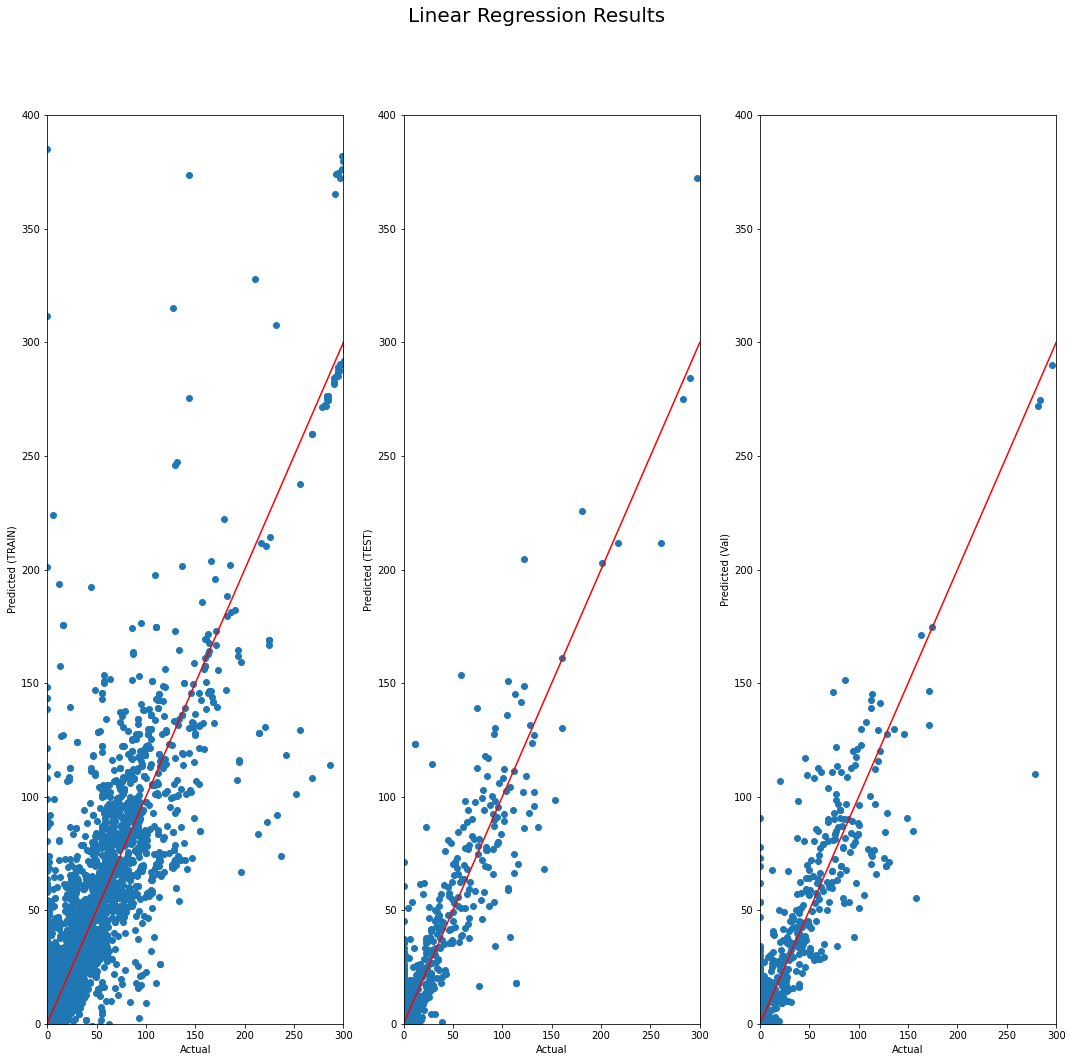

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 3 columns

# fig limits


# add a main title across top
fig.suptitle("Linear Regression Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y1_train, y=train_preds) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,300)
axes[0].set_ylim(0,400)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y1_test, y=test_preds) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,300)
axes[1].set_ylim(0,400)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


axes[2].scatter(x=y1_val, y=Val_preds) # first row, second entry (right top)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (Val)",  fontsize=10)
# set plot limits
axes[2].set_xlim(0,300)
axes[2].set_ylim(0,400)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

#### Model 2

##### Error Metric

In [ ]:

#  mae - poly
trainMAE_poly1 = mean_absolute_error(y1_train, train_preds_poly) #train
testMAE_poly1 = mean_absolute_error(y1_test, test_preds_poly) #test
valMAE_poly1 = mean_absolute_error(y1_val, val_preds_poly) #val

#  mae - pca
trainMAE_pca1 = mean_absolute_error(y1_train, train_preds_pca) #train
testMAE_pca1 = mean_absolute_error(y1_test, test_preds_pca) #test
valMAE_pca1 = mean_absolute_error(y1_val, val_preds_pca) #val

In [ ]:
#Creating dataframe
data = { 'Train data' : [trainMAE_poly1,trainMAE_pca1],
           'Test data' : [testMAE_poly1,testMAE_pca1],
           'Validation data' : [valMAE_poly1,valMAE_poly1]
        }
df_table = pd.DataFrame(data, index= ['Poly','PCA'])
#df_table.style.set_caption('Mean Absolute Error')
df_table.style.set_table_attributes("style='display:inline'").set_caption('Mean Absolute Error')

,Train data,Test data,Validation data
Poly,10.134706,18.855583,17.947168
PCA,14.278518,11.687753,17.947168


In [ ]:

# mse - poly
trainMAE_poly2 = mean_squared_error(y1_train, train_preds_poly) #train
testMAE_poly2 = mean_squared_error(y1_test, test_preds_poly) #test
valMAE_poly2 = mean_squared_error(y1_val, val_preds_poly)# val
#print('-')
#  mse - pca
trainMAE_pca2 = mean_squared_error(y1_train, train_preds_pca)#train
testMAE_pca2 = mean_squared_error(y1_test, test_preds_pca)#test
valMAE_pca2 = mean_squared_error(y1_val, val_preds_pca)#val

In [ ]:
#Creating Dataframe
data = { 'Train data' : [trainMAE_poly2,trainMAE_pca2],
           'Test data' : [testMAE_poly2,testMAE_pca2],
           'Validation data' : [valMAE_poly2,valMAE_pca2]
        }
df_table = pd.DataFrame(data, index= ['Poly','PCA'])
#df_table.style.set_caption('Mean Absolute Error')
df_table.style.set_table_attributes("style='display:inline'").set_caption('Mean Squared Error')

,Train data,Test data,Validation data
Poly,297.224148,7910.084369,4281.067511
PCA,2475.614654,337.189180,415.588956


There is no R2 for Non-linear models as SS Regression + SS Error does not equal SS Total in nonlinear regression! This renders R-squared for nonlinear models absolutely useless, as it no longer has to be between 0 and 100 percent.

##### Plot

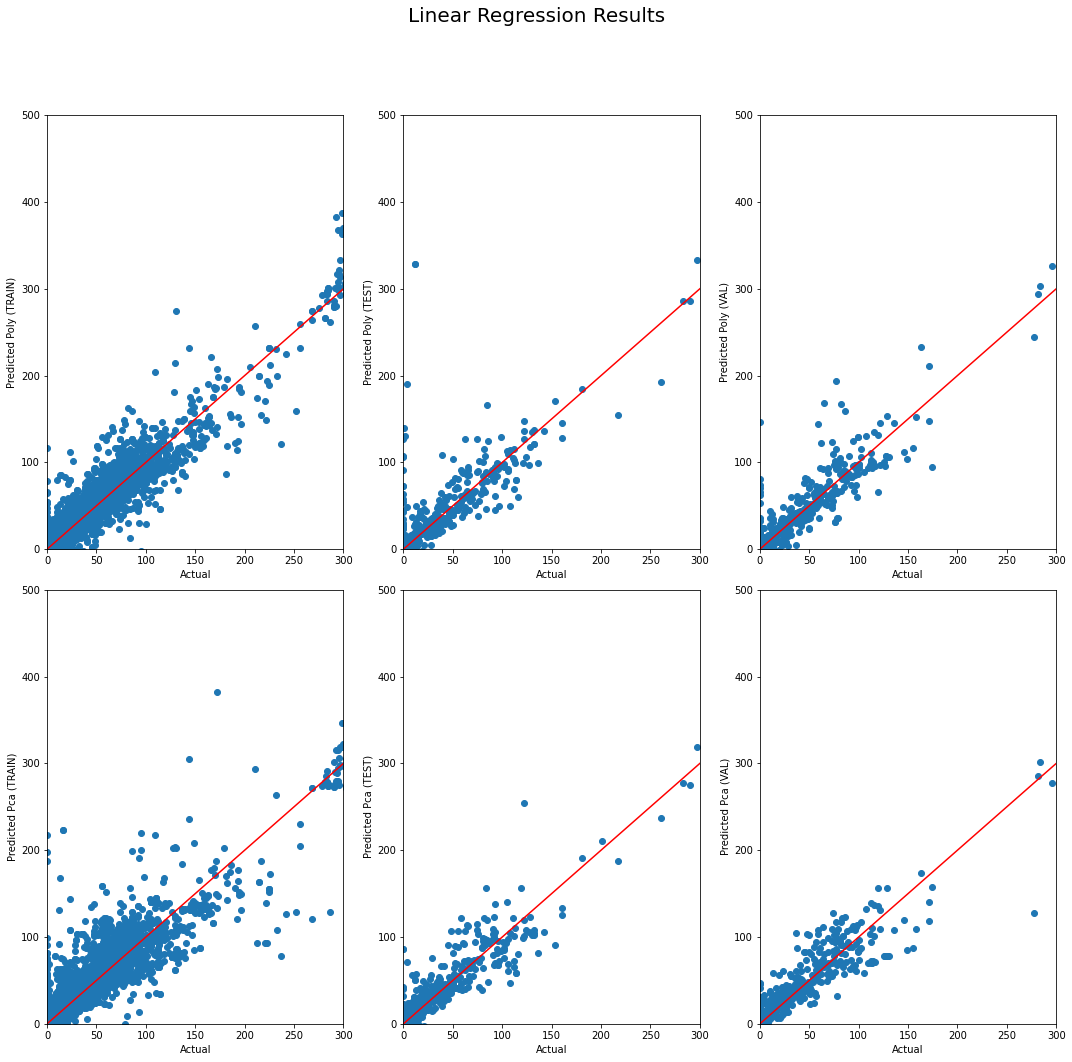

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(2,3) # 1 row, 3 columns

# fig limits


# add a main title across top
fig.suptitle("Linear Regression Results", fontsize=20)


### POLYNOMIAL FEATURES MODEL


axes[0][0].scatter(x=y1_train_poly, y=train_preds_poly) # first row, second entry (right top)
axes[0][0].set_xlabel("Actual", fontsize=10)
axes[0][0].set_ylabel("Predicted Poly (TRAIN)",  fontsize=10)
# set plot limits
axes[0][0].set_xlim(0,300)
axes[0][0].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[0][0].get_xlim())
axes[0][0].plot(x, x, color='red')

axes[0][1].scatter(x=y1_test_poly, y=test_preds_poly) # first row, second entry (right top)
axes[0][1].set_xlabel("Actual", fontsize=10)
axes[0][1].set_ylabel("Predicted Poly (TEST)",  fontsize=10)
# set plot limits
axes[0][1].set_xlim(0,300)
axes[0][1].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[0][1].get_xlim())
axes[0][1].plot(x, x, color='red')

axes[0][2].scatter(x=y1_val_poly, y=val_preds_poly) # first row, second entry (right top)
axes[0][2].set_xlabel("Actual", fontsize=10)
axes[0][2].set_ylabel("Predicted Poly (VAL)",  fontsize=10)
# set plot limits
axes[0][2].set_xlim(0,300)
axes[0][2].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[0][2].get_xlim())
axes[0][2].plot(x, x, color='red')


### PCA MODEL 

axes[1][0].scatter(x=y_train_pca, y=train_preds_pca) # first row, second entry (right top)
axes[1][0].set_xlabel("Actual", fontsize=10)
axes[1][0].set_ylabel("Predicted Pca (TRAIN)",  fontsize=10)
# set plot limits
axes[1][0].set_xlim(0,300)
axes[1][0].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[1][0].get_xlim())
axes[1][0].plot(x, x, color='red')

axes[1][1].scatter(x=y_test_pca, y=test_preds_pca) # first row, second entry (right top)
axes[1][1].set_xlabel("Actual", fontsize=10)
axes[1][1].set_ylabel("Predicted Pca (TEST)",  fontsize=10)
# set plot limits
axes[1][1].set_xlim(0,300)
axes[1][1].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[1][1].get_xlim())
axes[1][1].plot(x, x, color='red')

axes[1][2].scatter(x=y_val_pca, y=val_preds_pca) # first row, second entry (right top)
axes[1][2].set_xlabel("Actual", fontsize=10)
axes[1][2].set_ylabel("Predicted Pca (VAL)",  fontsize=10)
# set plot limits
axes[1][2].set_xlim(0,300)
axes[1][2].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[1][2].get_xlim())
axes[1][2].plot(x, x, color='red')


# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

#### Model 3

##### Error Metric

In [ ]:
#importing modules for regression errors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#mean absolute error
Train_MAE13 = mean_absolute_error(y13_train, train_preds13) #train
Test_MAE13 = mean_absolute_error(y13_test,test_preds13) #test
Val_MAE13 = mean_absolute_error(y13_val,Val_preds13) #val
#mean squared error
Train_MSE13 = mean_squared_error(y13_train, train_preds13) #train
Test_MSE13 = mean_squared_error(y13_test, test_preds13) #test
Val_MSE13 = mean_squared_error(y13_val, Val_preds13) #val
# Creating Dataframe
data = { 'Train data' : [r2_score(y13_train,train_preds13),Train_MAE13,Train_MSE13],
           'Test data' : [r2_score(y13_test, test_preds13),Test_MAE13,Test_MSE13],
           'Validation data' : [r2_score(y13_val, Val_preds13),Val_MAE13,Val_MSE13]}
df_table = pd.DataFrame(data, index= ['R2','MAE','MSE'])
df_table.style.set_table_attributes("style='display:inline'").set_caption('Error Metrics')

,Train data,Test data,Validation data
R2,0.664221,0.742457,0.605101
MAE,19.344013,20.728229,18.640034
MSE,3162.142708,1240.355770,1002.757586


##### Plot

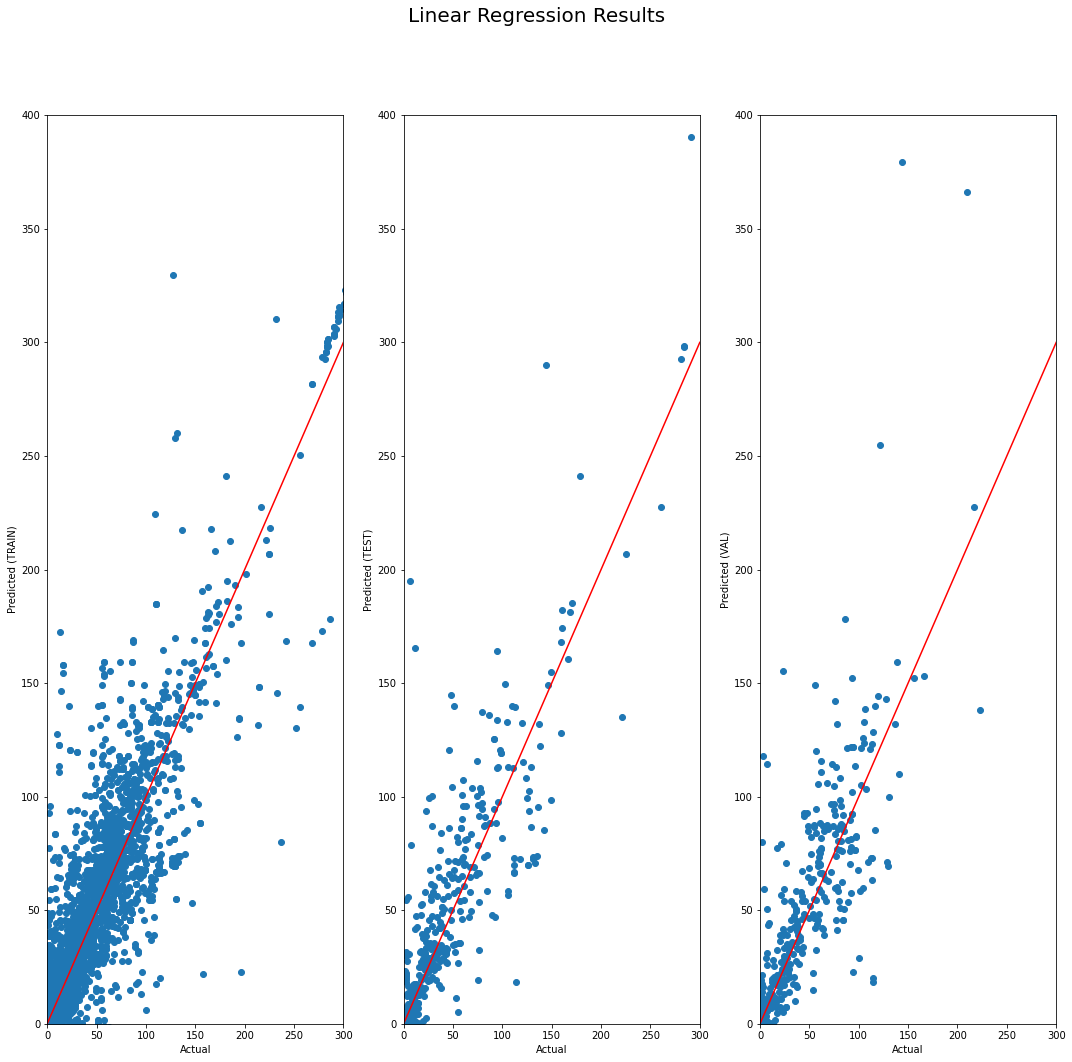

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(1,3) # 1 row, 2 columns

# fig limits


# add a main title across top
fig.suptitle("Linear Regression Results", fontsize=20)

# this makes the individual subplots
axes[0].scatter(x=y13_train, y=train_preds13) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
# set plot limits
axes[0].set_xlim(0,300)
axes[0].set_ylim(0,400)
# add 45 degree line to left panel
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')


axes[1].scatter(x=y13_test, y=test_preds13) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
# set plot limits
axes[1].set_xlim(0,300)
axes[1].set_ylim(0,400)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')


axes[2].scatter(x=y13_val, y=Val_preds13) # first row, second entry (right top)
axes[2].set_xlabel("Actual", fontsize=10)
axes[2].set_ylabel("Predicted (VAL)",  fontsize=10)
# set plot limits
axes[2].set_xlim(0,300)
axes[2].set_ylim(0,400)
# add 45 degree line to right panel
x = np.linspace(*axes[1].get_xlim())
axes[2].plot(x, x, color='red')

# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

#### Model 4

##### Error Metric

In [ ]:

# # 2) mae - poly
trainMAE_poly14 = mean_squared_error(y13_train, train14_preds_poly) #train
testMAE_poly14 = mean_squared_error(y13_test, test14_preds_poly) #test
valMAE_poly14 = mean_squared_error(y13_val, val14_preds_poly) #val
#print('-')
# # 2) mae - pca
trainMAE_pca14 = mean_squared_error(y13_train, train14_preds_pca) #train
testMAE_pca14 = mean_squared_error(y13_test, test14_preds_pca) #test
valMAE_pca14 = mean_squared_error(y13_val, val14_preds_pca) #Val

In [ ]:
#creating dataframe
data = { 'Train data' : [trainMAE_poly14,trainMAE_pca14],
           'Test data' : [testMAE_poly14,testMAE_pca14],
           'Validation data' : [valMAE_poly14,valMAE_poly14]
        }
df_table = pd.DataFrame(data, index= ['Poly','PCA'])
#df_table.style.set_caption('Mean Absolute Error')
df_table.style.set_table_attributes("style='display:inline'").set_caption('Mean Absolute Error')

,Train data,Test data,Validation data
Poly,206.130651,119897.122423,24264.622759
PCA,3514.581790,1157.739354,24264.622759


In [ ]:

# # 2) mae - poly
trainMAE_poly15 = mean_absolute_error(y13_train, train14_preds_poly) #train
testMAE_poly15 = mean_absolute_error(y13_test, test14_preds_poly) #test
valMAE_poly15 = mean_absolute_error(y13_val, val14_preds_poly) # val
#print('-')
# # 2) mae - pca
trainMAE_pca15 = mean_absolute_error(y13_train, train14_preds_pca) #train
testMAE_pca15 = mean_absolute_error(y13_test, test14_preds_pca) #test
valMAE_pca15 = mean_absolute_error(y13_val, val14_preds_pca) #val

In [ ]:
#Creating Dataframe
data = { 'Train data' : [trainMAE_poly15,trainMAE_pca15],
           'Test data' : [testMAE_poly15,testMAE_pca15],
           'Validation data' : [valMAE_poly15,valMAE_poly15]
        }
df_table = pd.DataFrame(data, index= ['Poly','PCA'])
#df_table.style.set_caption('Mean Absolute Error')
df_table.style.set_table_attributes("style='display:inline'").set_caption('Mean Squared Error')

,Train data,Test data,Validation data
Poly,9.388374,41.354053,25.952480
PCA,18.213905,19.479868,25.952480


##### Plot

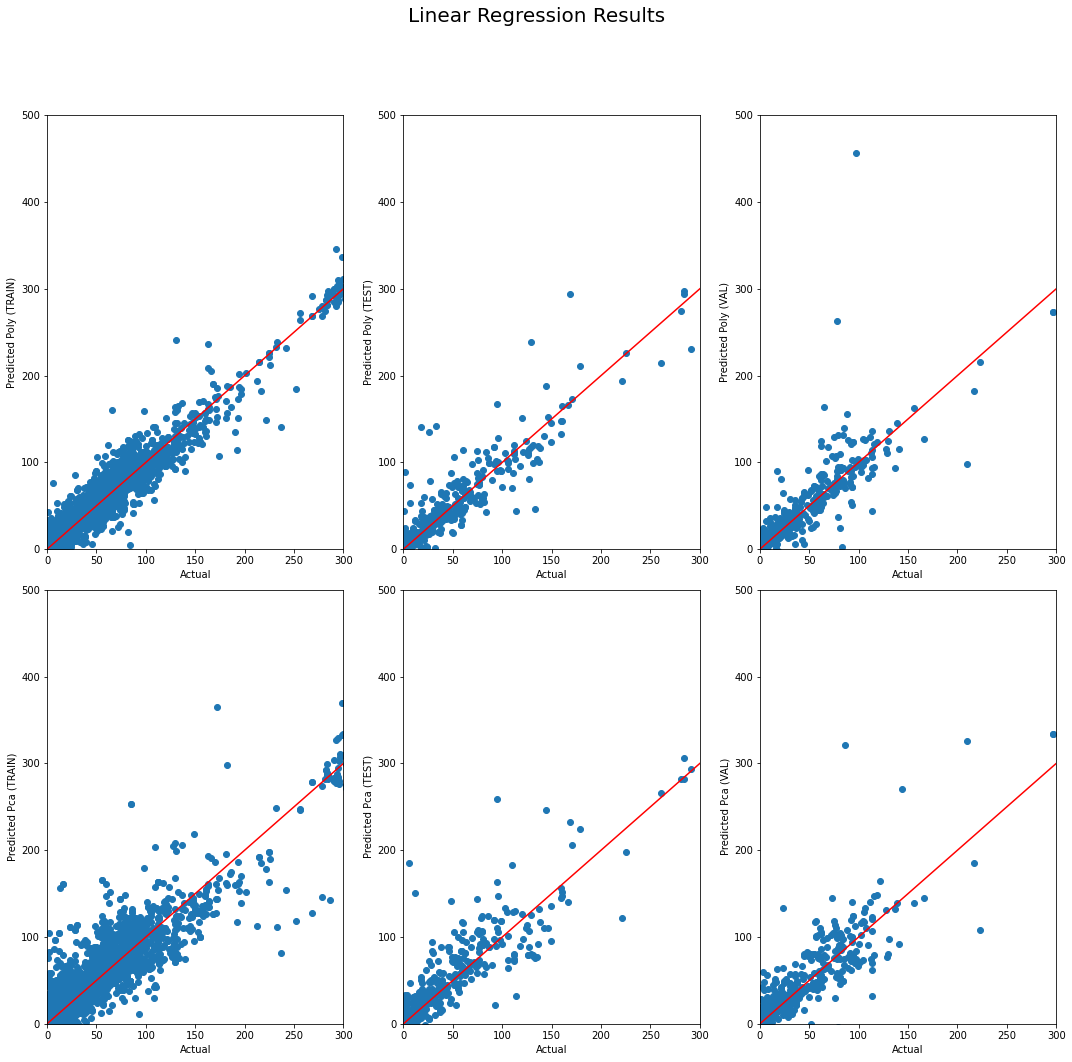

In [ ]:
# specify the dimensions 
fig, axes = plt.subplots(2,3) # 1 row, 3 columns

# fig limits


# add a main title across top
fig.suptitle("Linear Regression Results", fontsize=20)


### POLYNOMIAL FEATURES MODEL


axes[0][0].scatter(x=y14_train_poly, y=train14_preds_poly) # first row, second entry (right top)
axes[0][0].set_xlabel("Actual", fontsize=10)
axes[0][0].set_ylabel("Predicted Poly (TRAIN)",  fontsize=10)
# set plot limits
axes[0][0].set_xlim(0,300)
axes[0][0].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[0][0].get_xlim())
axes[0][0].plot(x, x, color='red')

axes[0][1].scatter(x=y14_test_poly, y=test14_preds_poly) # first row, second entry (right top)
axes[0][1].set_xlabel("Actual", fontsize=10)
axes[0][1].set_ylabel("Predicted Poly (TEST)",  fontsize=10)
# set plot limits
axes[0][1].set_xlim(0,300)
axes[0][1].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[0][1].get_xlim())
axes[0][1].plot(x, x, color='red')

axes[0][2].scatter(x=y14_val_poly, y=val14_preds_poly) # first row, second entry (right top)
axes[0][2].set_xlabel("Actual", fontsize=10)
axes[0][2].set_ylabel("Predicted Poly (VAL)",  fontsize=10)
# set plot limits
axes[0][2].set_xlim(0,300)
axes[0][2].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[0][2].get_xlim())
axes[0][2].plot(x, x, color='red')


### PCA MODEL 

axes[1][0].scatter(x=y14_train_pca, y=train14_preds_pca) # first row, second entry (right top)
axes[1][0].set_xlabel("Actual", fontsize=10)
axes[1][0].set_ylabel("Predicted Pca (TRAIN)",  fontsize=10)
# set plot limits
axes[1][0].set_xlim(0,300)
axes[1][0].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[1][0].get_xlim())
axes[1][0].plot(x, x, color='red')

axes[1][1].scatter(x=y14_test_pca, y=test14_preds_pca) # first row, second entry (right top)
axes[1][1].set_xlabel("Actual", fontsize=10)
axes[1][1].set_ylabel("Predicted Pca (TEST)",  fontsize=10)
# set plot limits
axes[1][1].set_xlim(0,300)
axes[1][1].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[1][1].get_xlim())
axes[1][1].plot(x, x, color='red')

axes[1][2].scatter(x=y14_val_pca, y=val14_preds_pca) # first row, second entry (right top)
axes[1][2].set_xlabel("Actual", fontsize=10)
axes[1][2].set_ylabel("Predicted Pca (VAL)",  fontsize=10)
# set plot limits
axes[1][2].set_xlim(0,300)
axes[1][2].set_ylim(0,500)
# add 45 degree line to right panel
x = np.linspace(*axes[1][2].get_xlim())
axes[1][2].plot(x, x, color='red')


# tight layout
fig.tight_layout()

fig.subplots_adjust(top=0.88)

# show the plot
plt.show()

## Advanced

### Model 1

In [ ]:
# Combination
M1_train_meta = X1_train_meta
M1_train_meta['Preds'] = train_preds
M1_train_meta['Target'] = y1_train
M1_train_meta['Preds-Target'] = train_preds - y1_train

# Min Value
M1_train_meta_min = M1_train_meta[M1_train_meta['Preds-Target']==M1_train_meta['Preds-Target'].min()]
print(M1_train_meta_min[['Category', 'Preds-Target']])

# Max Value
M1_train_meta_max = M1_train_meta[M1_train_meta['Preds-Target']==M1_train_meta['Preds-Target'].max()]
print(M1_train_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M1_train_meta['Preds-Target'].mean())

     Category  Preds-Target
1151   Brains  -2260.512821
          Category  Preds-Target
1156  Chitterlings    501.453561
1.2261041855013258e-14



*   In train dataset, "Brains" have the most trouble predicting in all food categories.

*   This model tend to overestimate in train dataset.




In [ ]:
# Negative prediction
M1_train_meta_negative = M1_train_meta[M1_train_meta['Preds-Target'] < 0]
print(M1_train_meta_negative['Category'].unique())

['Carrots' 'Frankfurter or hot dog sandwich' 'Chewing gum' ...
 'Irish Coffee'
 "Cereal or granola bar (Kellogg's Nutri-Grain Fruit and Nut Bar)"
 'Tzatziki dip']


*   Model 1 make a negative prediction for above categories in train dataset.


In [ ]:
# Combination
M1_test_meta = X1_test_meta
M1_test_meta['Preds'] = test_preds
M1_test_meta['Target'] = y1_test
M1_test_meta['Preds-Target'] = test_preds - y1_test

# Min Value
M1_test_meta_min = M1_test_meta[M1_test_meta['Preds-Target']==M1_test_meta['Preds-Target'].min()]
print(M1_test_meta_min[['Category', 'Preds-Target']])

# Max Value
M1_test_meta_max = M1_test_meta[M1_test_meta['Preds-Target']==M1_test_meta['Preds-Target'].max()]
print(M1_test_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M1_test_meta['Preds-Target'].mean())

     Category  Preds-Target
2933    Papad   -136.438852
     Category  Preds-Target
1575      Roe    119.402493
0.4586168842670196



*   In test dataset, "Papad" have the most trouble predicting in all food categories.

*   This model tend to overestimate in test dataset.




In [ ]:
# Negative prediction
M1_test_meta_negative = M1_test_meta[M1_test_meta['Preds-Target'] < 0]
print(M1_test_meta_negative['Category'].unique())

['Breadsticks' 'Ratatouille' 'Taquito or flauta with chicken'
 'Fluid replacement' 'Marshmallow' 'Iced Tea / Lemonade juice drink'
 'Papaya nectar' 'Cheese' 'Cabbage' 'Chicken or turkey' 'Pasta' 'Chicken'
 'Egg' 'Potato chips' 'Pork chop' 'Egg omelet or scrambled egg'
 'Ice cream sundae' 'Grilled cheese sandwich' 'Oatmeal' 'Cranberry juice'
 'Turkey or chicken sausage' 'Lemonade'
 'Cereal (General Mills Cocoa Puffs)' 'Frozen mocha coffee drink' 'Rice'
 'Cookie' 'Energy drink (No Fear)' 'Chicken thigh' 'Matzo ball soup'
 'Chicken tenders or strips' 'Frankfurter or hot dog sandwich'
 'Rice with vienna sausage' 'Crayfish' 'Shrimp creole' 'Chicken leg'
 'Knish' 'Blue or roquefort cheese dressing' 'Pizza with pepperoni'
 'Fruit punch' 'Cake or cupcake' 'Sandwich spread'
 'Chicken or turkey and potatoes with gravy' 'Fruit juice drink' 'Carrots'
 'Ravioli' 'Tilapia' 'Shrimp shish kabob with vegetables'
 'Gumbo with rice' 'Plum' 'Sports drink (Gatorade G)' 'Pumpkin'
 'Chicken breast' 'Muffin'


*   Model 1 make a negative prediction for above categories in test dataset.


In [ ]:
# Combination
M1_val_meta = X1_val_meta
M1_val_meta['Preds'] = Val_preds
M1_val_meta['Target'] = y1_val
M1_val_meta['Preds-Target'] = Val_preds - y1_val

# Min Value
M1_val_meta_min = M1_val_meta[M1_val_meta['Preds-Target']==M1_val_meta['Preds-Target'].min()]
print(M1_val_meta_min[['Category', 'Preds-Target']])

# Max Value
M1_val_meta_max = M1_val_meta[M1_val_meta['Preds-Target']==M1_val_meta['Preds-Target'].max()]
print(M1_val_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M1_val_meta['Preds-Target'].mean())

                        Category  Preds-Target
2955  Textured vegetable protein   -213.163961
      Category  Preds-Target
2984  Meatball      90.66763
0.2053275378641946



*   In validation dataset, "Textured vegetable protein" have the most trouble predicting in all food categories.

*   This model tend to overestimate in validation dataset.




In [ ]:
# Negative prediction
M1_val_meta_negative = M1_val_meta[M1_val_meta['Preds-Target'] < 0]
print(M1_val_meta_negative['Category'].unique())

['Carbonated water' 'Plantain chips' 'Pizza' 'Sweet potato' 'Rice'
 'Blueberry syrup' 'Pasta' 'Chicken leg' 'Fish curry'
 'Vegetable rice soup' 'Watermelon juice' 'Pizza with pepperoni' 'Popcorn'
 'Perch' 'Beans and brown rice' 'Potato' 'Frozen fruit juice bar' 'Cake'
 'Egg' 'Yogurt' 'Graham crackers' 'Cereal (General Mills Fiber One)'
 'Stuffed christophine' 'Chicken drumstick' 'Coffee' 'Dill dip' 'Cheese'
 'Light ice cream cone' 'Ice cream soda' 'Peach cobbler' 'Cheese sandwich'
 'Enchilada with meat' 'Rum' 'Minestrone soup'
 'Dietetic or low calorie candy' 'Apple-cherry juice' 'Beets'
 'Apple-fruit juice blend' 'Topping from vegetable pizza'
 'Chicken with rice and vegetable' 'Iced Coffee'
 'Applesauce with cherries' 'Egg omelet or scrambled egg'
 'Fish curry with rice' 'Chimichanga with chicken' 'Cheeseburger'
 'Apricots' 'Chicken' 'Pork bacon' 'Turkey' 'Bread' 'Peppers and onions'
 'Chicken or turkey' 'Chicken wing' 'Olive oil' 'Daikon radish' 'Pie'
 'Vegetable beef soup' 'Tuna sa

*   Model 1 make a negative prediction for above categories in validation dataset.


### Model 2

In [ ]:
# Combination
M2_train_meta = X2_train_meta
M2_train_meta['Preds'] = train_preds_poly
M2_train_meta['Target'] = y1_train_poly
M2_train_meta['Preds-Target'] = train_preds_poly - y1_train_poly

# Min Value
M2_train_meta_min = M2_train_meta[M2_train_meta['Preds-Target']==M2_train_meta['Preds-Target'].min()]
print(M2_train_meta_min[['Category', 'Preds-Target']])

# Max Value
M2_train_meta_max = M2_train_meta[M2_train_meta['Preds-Target']==M2_train_meta['Preds-Target'].max()]
print(M2_train_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M2_train_meta['Preds-Target'].mean())

     Category  Preds-Target
5636  Spinach   -326.353172
      Category  Preds-Target
5584  Collards     143.75309
1.7364038823790693e-09



*   In train dataset, "Spinach" have the most trouble predicting in all food categories.

*   This model tend to overestimate in train dataset.




In [ ]:
# Negative prediction
M2_train_meta_negative = M2_train_meta[M2_train_meta['Preds-Target'] < 0]
print(M2_train_meta_negative['Category'].unique())

['Cream' 'Cherry pie filling' 'Lamb' ... 'Lotus root' 'Pesto sauce'
 'Seaweed soup']


*   Model 2 make a negative prediction for above categories in train dataset.


In [ ]:
# Combination
M2_test_meta = X2_test_meta
M2_test_meta['Preds'] = test_preds_poly
M2_test_meta['Target'] = y1_test_poly
M2_test_meta['Preds-Target'] = test_preds_poly - y1_test_poly

# Min Value
M2_test_meta_min = M2_test_meta[M2_test_meta['Preds-Target']==M2_test_meta['Preds-Target'].min()]
print(M2_test_meta_min[['Category', 'Preds-Target']])

# Max Value
M2_test_meta_max = M2_test_meta[M2_test_meta['Preds-Target']==M2_test_meta['Preds-Target'].max()]
print(M2_test_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M2_test_meta['Preds-Target'].mean())

     Category  Preds-Target
5567  Dasheen  -1837.799242
           Category  Preds-Target
129  Chocolate milk    799.410997
1.382311506184026



*   In test dataset, "Dasheen" have the most trouble predicting in all food categories.

*   This model tend to overestimate in test dataset.




In [ ]:
# Negative prediction
M2_test_meta_negative = M2_test_meta[M2_test_meta['Preds-Target'] < 0]
print(M2_test_meta_negative['Category'].unique())

['Pork roast' 'Cabbage salad or coleslaw'
 'Cereal (General Mills Fiber One Raisin Bran Clusters)' 'Pasta' 'Cereal'
 'Infant formula' 'Peas and carrots' 'Heart' 'Grits' nan
 'Pasta with tomato-based sauce' 'Whiting' 'Pretzels' 'Corned beef'
 'Apple' 'Beef stew with potatoes' 'Kale' 'Ravioli' 'Cream cheese' 'Pizza'
 'Fish' 'Popcorn' 'Muffin' 'Turnip greens' 'Green beans' 'Rice'
 'Quesadilla with vegetables and meat' 'Macaroni and cheese' 'Potatoes'
 'Bread' 'Cherries' 'Oatmeal' 'Halibut' 'Vegetarian vegetable soup' 'Cod'
 'Mullet' 'White pizza' 'Pineapple juice' 'Beef broth' 'Orange juice'
 'Tamale casserole with meat' 'Grape juice' 'Egg omelet or scrambled egg'
 "Cereal (Kellogg's Raisin Bran)" 'Palak Paneer' 'Collards' 'Soy milk'
 'Pizza with meat other than pepperoni'
 'Chili con carne with venison/deer and beans' 'Chicken leg' 'Pie'
 'Peanut butter and chocolate spread' 'Popover' 'Pasta with cream sauce'
 'Chicken fillet sandwich' 'Pompano' 'Whipped topping' 'Snails'
 'Cereal (Malt-

*   Model 2 make a negative prediction for above categories in test dataset.


In [ ]:
# Combination
M2_val_meta = X2_val_meta
M2_val_meta['Preds'] = val_preds_poly
M2_val_meta['Target'] = y1_val_poly
M2_val_meta['Preds-Target'] = val_preds_poly - y1_val_poly

# Min Value
M2_val_meta_min = M2_val_meta[M2_val_meta['Preds-Target']==M2_val_meta['Preds-Target'].min()]
print(M2_val_meta_min[['Category', 'Preds-Target']])

# Max Value
M2_val_meta_max = M2_val_meta[M2_val_meta['Preds-Target']==M2_val_meta['Preds-Target'].max()]
print(M2_val_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M2_val_meta['Preds-Target'].mean())

                                            Category  Preds-Target
2138  Veal goulash with vegetables excluding carrots  -1041.159231
                   Category  Preds-Target
3745  Cereal or granola bar    547.703985
-3.862256121824862



*   In validation dataset, "Veal goulash with vegetables excluding carrots" have the most trouble predicting in all food categories.

*   This model tend to underestimate in validation dataset.




In [ ]:
# Negative prediction
M2_val_meta_negative = M2_val_meta[M2_val_meta['Preds-Target'] < 0]
print(M2_val_meta_negative['Category'].unique())

['Infant formula' 'Bagel' 'Pasta with tomato-based sauce' 'Muffin'
 'Cornbread muffin' 'Beef' 'Steak sandwich' 'Waffle' nan 'Cake or cupcake'
 'Cookie' 'Chicken wing' 'Broccoli' 'Nachos with cheese' 'Ham'
 'Sour cream' 'Lettuce' 'Soft taco with meat' 'Orange-apple-banana juice'
 'Oatmeal' 'Pompano' 'Tortellini' 'Doughnut' 'Pan Dulce' 'Stuffed shells'
 'Mixed vegetables' 'Barley' 'Rice cake' 'Calzone' 'Pecans'
 'Chili con carne without beans' 'Potato chips' 'Mushrooms'
 'Stuffed green pepper' 'Grits' 'Cauliflower' 'Clams'
 'Beef and rice with tomato-based sauce' 'Egg omelet or scrambled egg'
 'Lentils' 'Salad dressing' 'Barley cereal' 'Chocolate milk' 'Okra'
 'Spanish rice' 'Cream of wheat' 'Brioche' 'Chili con carne with beans'
 'Pasta with cream sauce and added vegetables' 'Lefse (Norwegian)'
 'Chili con carne' 'Venison or deer with gravy' 'Cream cheese'
 'Grapefruit' 'Cereal or granola bar' 'Rice' 'Shrimp' 'Frozen yogurt bar'
 'Pie' 'Macaroni or pasta salad with tuna and egg'
 "Cerea

*   Model 2 make a negative prediction for above categories in validation dataset.


### Model 3

In [ ]:
# Combination
M3_train_meta = X3_train_meta
M3_train_meta['Preds'] = train_preds13
M3_train_meta['Target'] = y13_train
M3_train_meta['Preds-Target'] = train_preds13 - y13_train

# Min Value
M3_train_meta_min = M3_train_meta[M3_train_meta['Preds-Target']==M3_train_meta['Preds-Target'].min()]
print(M3_train_meta_min[['Category', 'Preds-Target']])

# Max Value
M3_train_meta_max = M3_train_meta[M3_train_meta['Preds-Target']==M3_train_meta['Preds-Target'].max()]
print(M3_train_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M3_train_meta['Preds-Target'].mean())

     Category  Preds-Target
1151   Brains  -2202.489825
          Category  Preds-Target
1156  Chitterlings    548.469719
-6.4664500772411996e-15



*   In train dataset, "Brains" have the most trouble predicting in all food categories.

*   This model tend to underestimate in train dataset.




In [ ]:
# Negative prediction
M3_train_meta_negative = M3_train_meta[M3_train_meta['Preds-Target'] < 0]
print(M3_train_meta_negative['Category'].unique())

['Bacon' 'Pasta' 'Macaroni or noodles with cheese'
 'Chicken or turkey and rice with mushroom sauce' 'Rice'
 'Pork vegetable soup with potato' 'Chicken with noodles and cheese sauce'
 'Chocolate milk' 'Cheese' 'Chicken barbecue sandwich' 'Stewed'
 'Spanish rice' 'Macaroni or pasta salad with chicken'
 'Pizza with extra meat' 'Enchilada with meat' 'Fudge' 'Peppers'
 'Chicken noodle dinner' 'Macaroni or pasta salad' 'Pork stew' 'Shrimp'
 'Chicken or turkey chow mein or chop suey with noodles' 'Carp'
 'Ice cream sandwich' 'Vegetable dip' 'Pastry' 'Fish stock'
 'Turkey light or dark meat' 'Sushi roll' 'Hot chocolate / Cocoa'
 'Chicken or turkey' 'Fufu' 'Celery' 'Duck' 'Yogurt' 'Potato salad'
 'Pancakes' 'Cake or cupcake' 'Puerto Rican white cheese' 'Oatmeal'
 'Beans with meat' 'Hash' 'Chicken or turkey garden salad' 'Cake'
 'Coleslaw dressing' 'Whiting' 'Bread' 'Crepe' 'Pan Dulce' 'Potato'
 'Pork chop' 'Chicken skin' 'Muffin' 'Carrots' 'Rice with Spanish sausage'
 'Chili con carne with bea

*   Model 3 make a negative prediction for above categories in train dataset.


In [ ]:
# Combination
M3_test_meta = X3_test_meta
M3_test_meta['Preds'] = test_preds13
M3_test_meta['Target'] = y13_test
M3_test_meta['Preds-Target'] = test_preds13 - y13_test

# Min Value
M3_test_meta_min = M3_test_meta[M3_test_meta['Preds-Target']==M3_test_meta['Preds-Target'].min()]
print(M3_test_meta_min[['Category', 'Preds-Target']])

# Max Value
M3_test_meta_max = M3_test_meta[M3_test_meta['Preds-Target']==M3_test_meta['Preds-Target'].max()]
print(M3_test_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M3_test_meta['Preds-Target'].mean())

                                              Category  Preds-Target
7010  Nutritional powder mix (EAS Whey Protein Powder)   -247.667732
     Category  Preds-Target
1574      Roe    197.635465
3.2338264630280524



*   In test dataset, "Nutritional powder mix (EAS Whey Protein Powder)" have the most trouble predicting in all food categories.

*   This model tend to overestimate in test dataset.




In [ ]:
# Negative prediction
M3_test_meta_negative = M3_test_meta[M3_test_meta['Preds-Target'] < 0]
print(M3_test_meta_negative['Category'].unique())

['Ham' 'Chicken or turkey fricassee' 'Lasagna with chicken or turkey'
 'Bread' 'Potato' 'Table fat' 'Beef' 'Vegetarian stew' 'Cake' 'Calzone'
 'Chicken or turkey' 'Blue or roquefort cheese dressing'
 'Chicken drumstick' 'Hamburger' 'Turkey with gravy' 'Cheese'
 'Egg substitute' 'Soyburger' 'Rice' 'Coffee' 'Carp' 'Cheese sandwich'
 'Beef short ribs' 'Brussels sprouts' 'Butter' 'Chicken'
 'Burrito with meat' 'Chicken wing' 'Frozen yogurt bar' 'Herring'
 'Chicken leg' 'Sopa Seca de Fideo' 'Pork chop' 'Pie'
 'Chicken or turkey rice soup' 'Ravioli' 'Cookie'
 'Cabbage salad or coleslaw' 'Vanilla wafer dessert base' 'Pasta'
 'Pasta with cream sauce' 'Dirty rice' 'Seafood dip' 'Cream of wheat'
 'Chicken fillet sandwich' 'Peanut Bar'
 'Potato from Puerto Rican style stuffed pot roast'
 'Chicken or turkey salad' 'Stuffed tannier fritters'
 'Beef and noodles with meat sauce and cheese' 'Turnover'
 'Beef with vegetables' 'Corned beef' 'Beef stroganoff soup'
 'Buffalo chicken submarine sandwich' 'P

*   Model 3 make a negative prediction for above categories in test dataset.


In [ ]:
# Combination
M3_val_meta = X3_val_meta
M3_val_meta['Preds'] = Val_preds13
M3_val_meta['Target'] = y13_val
M3_val_meta['Preds-Target'] = Val_preds13 - y13_val

# Min Value
M3_val_meta_min = M3_val_meta[M3_val_meta['Preds-Target']==M3_val_meta['Preds-Target'].min()]
print(M3_val_meta_min[['Category', 'Preds-Target']])

# Max Value
M3_val_meta_max = M3_val_meta[M3_val_meta['Preds-Target']==M3_val_meta['Preds-Target'].max()]
print(M3_val_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M3_val_meta['Preds-Target'].mean())

    Category  Preds-Target
707     Beef   -153.014601
     Category  Preds-Target
1468   Salmon     235.20891
2.8392895769735116



*   In validation dataset, "Salmon" have the most trouble predicting in all food categories.

*   This model tend to overestimate in validation dataset.




In [ ]:
# Negative prediction
M3_val_meta_negative = M3_val_meta[M3_val_meta['Preds-Target'] < 0]
print(M3_val_meta_negative['Category'].unique())

['Rice' 'Chicken breast' 'Beef' 'Pork and vegetables including carrots'
 'Potato' 'Frankfurter or hot dog sandwich' 'Thousand Island dressing'
 'Waffle' 'Chicken or turkey' 'MILKY WAY MIDNIGHT Bar' 'Oil or table fat'
 'Shrimp soup' 'Bread' 'Oatmeal' 'Coffee' 'Carp' 'Chicken drumstick'
 'Ravioli' 'Pie' 'Chicken' 'Crackers' 'Chicken wing' 'Cheese' 'Squid'
 'Pudding' 'Peanut brittle' 'Chicken or turkey garden salad'
 'Chicken fillet sandwich' 'Milk shake' 'Chicken thigh' 'Pork roast'
 'Salisbury steak' 'Bacon sandwich' 'Creme brulee'
 'Chili con carne with beans' 'Stewed pork' 'White pizza'
 'Egg and ham on biscuit' 'Burrito with chicken and beans' 'Spinach soup'
 'Nachos with meat and cheese' 'Pasta' 'Pizza with pepperoni'
 'Shrimp and noodles with cheese sauce' 'Cake or cupcake' 'Canadian bacon'
 'Yogurt' 'Okra' 'Light ice cream' 'Egg white' 'Milk' 'Summer squash'
 'Tamale with meat' 'Big Mac (McDonalds)' 'Cream'
 'Macaroni with vegetables' 'Beets' 'Cheese sandwich' 'Naan' 'Tilapia'
 'M

*   Model 3 make a negative prediction for above categories in validation dataset.


### Model 4

In [ ]:
# Combination
M4_train_meta = X4_train_meta
M4_train_meta['Preds'] = train14_preds_poly
M4_train_meta['Target'] = y14_train_poly
M4_train_meta['Preds-Target'] = train14_preds_poly - y14_train_poly

# Min Value
M4_train_meta_min = M4_train_meta[M4_train_meta['Preds-Target']==M4_train_meta['Preds-Target'].min()]
print(M3_train_meta_min[['Category', 'Preds-Target']])

# Max Value
M4_train_meta_max = M4_train_meta[M4_train_meta['Preds-Target']==M4_train_meta['Preds-Target'].max()]
print(M4_train_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M4_train_meta['Preds-Target'].mean())

     Category  Preds-Target
1151   Brains  -2202.489825
     Category  Preds-Target
3646      NaN    109.967816
3.6106802663656343e-09



*   In train dataset, "Brains" have the most trouble predicting in all food categories.

*   This model tend to overestimate in train dataset.




In [ ]:
# Negative prediction
M4_train_meta_negative = M4_train_meta[M4_train_meta['Preds-Target'] < 0]
print(M4_train_meta_negative['Category'].unique())

['Pannetone' 'Air filled fritter or fried puff'
 'Egg omelet or scrambled egg' 'Chocolate milk' 'Bacon on biscuit'
 "Bird's nest soup" 'Fish sandwich' nan 'Egg and cheese on biscuit'
 'Chicken or turkey' 'Sweet and sour pork with rice' 'Chicken wing'
 'Porgy' 'Pork' 'Cake' 'Sausage and vegetables including  carrots' 'Carp'
 'Infant formula' 'Oatmeal' 'Pompano' 'Flounder' 'Chicken patty'
 'Hot chocolate / Cocoa' 'Beef stew with potatoes'
 'Vanilla wafer dessert base' 'Duck egg' 'Lobster salad' 'Pie'
 'Chicken submarine sandwich' 'Pork chop' 'Sirloin beef' 'Chicken thigh'
 'Creme brulee' 'Sea bass' 'Cheese' 'Crab imperial' 'Snack mix' 'Beef'
 'Milk shake' 'Baked beans' 'Whipped topping' 'Cod' 'Sausage sandwich'
 'Pork roast' 'Mussels' 'Bread' 'Bacon and egg sandwich' 'Grits'
 'Frankfurter or hot dog sandwich' 'Chicken breast'
 'Turkey or chicken and pork sausage'
 'Stewed chicken with tomato-based sauce' 'Shrimp gumbo' 'Cottage cheese'
 'Milk' 'Waffle' 'Turkey sandwich' 'Fish' 'Ham and c

*   Model 4 make a negative prediction for above categories in train dataset.


In [ ]:
# Combination
M4_test_meta = X4_test_meta
M4_test_meta['Preds'] = test14_preds_poly
M4_test_meta['Target'] = y14_test_poly
M4_test_meta['Preds-Target'] = test14_preds_poly - y14_test_poly

# Min Value
M4_test_meta_min = M4_test_meta[M4_test_meta['Preds-Target']==M4_test_meta['Preds-Target'].min()]
print(M3_test_meta_min[['Category', 'Preds-Target']])

# Max Value
M4_test_meta_max = M4_test_meta[M4_test_meta['Preds-Target']==M4_test_meta['Preds-Target'].max()]
print(M4_test_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M4_test_meta['Preds-Target'].mean())

                                              Category  Preds-Target
7010  Nutritional powder mix (EAS Whey Protein Powder)   -247.667732
         Category  Preds-Target
3208  Breadsticks    882.393823
-14.303056281101934



*   In test dataset, "Breadsticks" have the most trouble predicting in all food categories.

*   This model tend to underestimate in test dataset.




In [ ]:
# Negative prediction
M4_test_meta_negative = M4_test_meta[M4_test_meta['Preds-Target'] < 0]
print(M4_test_meta_negative['Category'].unique())

['Egg' nan 'Chicken or turkey salad' 'Flounder' 'Cheese sandwich' 'Beef'
 'Perch' 'Ice cream cone' 'Bean and ham soup'
 'Chicken or turkey stew with potatoes and vegetables excluding carrots'
 'Pork chop' 'Beaver' 'Cake or cupcake'
 'Chicken or turkey and vegetables including carrots' 'Mackerel'
 'Basbousa' 'Cornmeal mush' 'Cheddar cheese soup' 'Pie' 'Chocolate milk'
 'Pork steak or cutlet' 'Cheese' 'Haddock' 'Dumpling' 'Beer cheese soup'
 'Cheeseburger' 'Ice cream sundae' 'Shrimp' 'Yogurt'
 'Chicken or turkey vegetable soup with noodles' 'Banana split'
 'Turkey or chicken sausage' 'Chicken drumstick' 'Salmon salad' 'Catfish'
 'Chicken' 'Frankfurter or hot dog sandwich'
 'Fish and rice with cream sauce' 'Tilapia' 'Egg white' 'Trout'
 'Infant formula' 'Milk' 'Meat loaf made with chicken or turkey' 'Brains'
 'Veal with gravy' 'Pancakes' 'Barfi or Burfi' 'Cake' 'Beef steak'
 'Cake batter' 'Chicken or turkey soup' 'Codfish' 'Crab cake sandwich'
 'Pork' 'Lobster' 'Oatmeal' 'Beef and rice so

*   Model 4 make a negative prediction for above categories in test dataset.


In [ ]:
# Combination
M4_val_meta = X4_val_meta
M4_val_meta['Preds'] = val14_preds_poly
M4_val_meta['Target'] = y14_val_poly
M4_val_meta['Preds-Target'] = val14_preds_poly - y14_val_poly

# Min Value
M4_val_meta_min = M4_val_meta[M4_val_meta['Preds-Target']==M4_val_meta['Preds-Target'].min()]
print(M4_val_meta_min[['Category', 'Preds-Target']])

# Max Value
M4_val_meta_max = M4_val_meta[M4_val_meta['Preds-Target']==M4_val_meta['Preds-Target'].max()]
print(M4_val_meta_max[['Category', 'Preds-Target']])

# Mean of 'Preds-Target'
print(M4_val_meta['Preds-Target'].mean())

                      Category  Preds-Target
428  Ice cream cookie sandwich  -3038.778958
           Category  Preds-Target
185  Fruit smoothie    359.649337
-10.274594725917831



*   In validation dataset, "Fruit smoothie" have the most trouble predicting in all food categories.

*   This model tend to underestimate in validation dataset.




In [ ]:
# Negative prediction
M4_val_meta_negative = M4_val_meta[M4_val_meta['Preds-Target'] < 0]
print(M4_val_meta_negative['Category'].unique())

['Breadsticks' 'Scrapple' 'Venison/deer' 'Chicken or turkey' 'Yogurt'
 'Steak sandwich' 'Infant formula' 'Ham' 'Chicken breast' 'Pork' 'Mullet'
 'Catfish' 'Bologna' 'Shrimp shish kabob with vegetables' nan 'Cream puff'
 'Egg omelet or scrambled egg' 'Pie' 'Veal chop'
 'Lamb shish kabob with vegetables' 'Bean soup' 'Fish' 'Lima bean soup'
 'Bread' 'Cake or cupcake' 'Milk' 'Muffin' 'Turkey' 'Beef' 'Hamburger'
 'Chili con carne' 'Pork with vegetable excluding carrots' 'Fish sandwich'
 'Layer dip' 'Beef and egg noodles' 'Eel'
 'Meat loaf made with chicken or turkey' 'Stewed' 'Welsh rarebit'
 'Salisbury steak with gravy' 'Frozen yogurt' 'Popcorn'
 'Tuna noodle casserole with vegetables and mushroom sauce'
 'Shrimp and noodles with cheese sauce' 'Roll' 'Chicken' 'Egg'
 'Imitation cheese' 'Chili con carne with beans and cheese' 'Pancakes'
 'Ice cream bar' 'Pompano' 'Chicken fillet sandwich' 'Eggs a la Malaguena'
 'Cobbler' 'Cream' 'Turnover' 'Crepe' 'Frankfurter or hot dog sandwich'
 'Pretzel

*   Model 4 make a negative prediction for above categories in validation dataset.


# Modeling (Classification) 

* Model 5: Fit a very basic logistic regression model 
* Model 6: Using all pre-processing and advanced modeling techniques to build an amazing model. 

## Model 5

In [ ]:
from sklearn.linear_model import LogisticRegression
# make a variable to store the general model
LR1 = LogisticRegression()
# fit the model - one line of code
LR1 = LR1.fit(X2_train, y2_train)
# store the predictions
train_preds_m5 = LR1.predict(X2_train)
test_preds_m5 = LR1.predict(X2_test)
val_preds_m5 = LR1.predict(X2_val)

## Model 6

### Polynomial and Interaction Terms

In [ ]:
# polynomial and interaction terms
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2) # square it, raise to second power
X_poly = poly.fit_transform(X2)
# this is stored as a numpy array
# let's store these as a pd dataframe
X_poly = pd.DataFrame(X_poly)
print(X_poly.shape)
X_poly.head()

(6375, 630)


,0,1,2,3,4,5,6,7,8,9,...,620,621,622,623,624,625,626,627,628,629
0,1.0,396.0,1003.0,0.0,22.37,11.0,2.1,326.0,0.0,2.207,...,0.013689,0.1521,0.02808,0.4797,1.69,0.312,5.33,0.0576,0.984,16.81
1,1.0,0.0,27.0,0.0,16.77,15.2,1.1,0.0,0.0,1.055,...,0.094249,2.9472,0.19955,1.0438,92.16,6.240,32.64,0.4225,2.210,11.56
2,1.0,0.0,0.0,8.0,0.67,219.1,0.0,469.0,0.0,0.063,...,0.022801,0.0000,0.26274,1.2080,0.00,0.000,0.00,3.0276,13.920,64.00
3,1.0,0.0,0.0,0.0,0.00,51.5,0.0,0.0,0.0,3.000,...,0.040000,0.0000,0.03600,0.0200,0.00,0.000,0.00,0.0324,0.018,0.01
4,1.0,0.0,53.0,1.0,9.93,81.8,0.6,48.0,0.0,1.928,...,0.156025,0.0000,0.76630,3.8315,0.00,0.000,0.00,3.7636,18.818,94.09


In [ ]:
# that first column looks annoying (all 1's, so I'm gonna drop it)
del X_poly[0]
print(X_poly.shape) # went from 630 to 629... good.

(6375, 629)


In [ ]:
# split the data
# use an 80/10/10 split for train, test and validation
X_poly_train, X_poly_val, y_poly_train, y_poly_val = train_test_split(X_poly, y2,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 12)
X_poly_test, X_poly_val, y_poly_test, y_poly_val = train_test_split(X_poly_val, y_poly_val,
                                                    test_size = 0.5,
                                                    shuffle = True,
                                                    random_state = 12)
# check the shape
print(X_poly_train.shape, X_poly_test.shape, X_poly_val.shape, y_poly_train.shape, y_poly_test.shape, y_poly_val.shape)

(5100, 629) (637, 629) (638, 629) (5100,) (637,) (638,)


In [ ]:
# convert these all to numpy arrays
X_poly_train = np.array(X_poly_train)
X_poly_test = np.array(X_poly_test)
X_poly_val = np.array(X_poly_val)
y_poly_train = np.array(y_poly_train)
y_poly_test = np.array(y_poly_test)
y_poly_val = np.array(y_poly_val)

In [ ]:
# ensure all of X data is between 0 (min) and 1 (max)
scaler = MinMaxScaler()
X_poly_train = scaler.fit_transform(X_poly_train)
X_poly_test = scaler.transform(X_poly_test)
X_poly_val = scaler.transform(X_poly_val)

In [ ]:
# make a variable to store the general model
LR_poly = LogisticRegression()
# fit the model - one line of code
LR_poly = LR_poly.fit(X_poly_train, y_poly_train)
# store the predictions
train_preds_poly = LR_poly.predict(X_poly_train)
test_preds_poly = LR_poly.predict(X_poly_test)
val_preds_poly = LR_poly.predict(X_poly_val)

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95) # this means keep components that maintain 95% of the variance

# to the train data
X_train_pca = pca.fit_transform(X_poly_train)

In [ ]:
# A few columns that explain 95% of the variance
X_train_pca = pd.DataFrame(X_train_pca)
print(X_train_pca.shape)
X_train_pca.head()

(5100, 74)


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.609191,-0.320847,0.518028,0.470850,0.070274,0.109275,0.000025,-0.014535,-0.043368,0.568182,...,0.030367,0.019261,0.063782,0.005801,0.009382,0.016034,0.023539,0.017910,0.021515,-0.004872
1,-0.197495,-0.388852,-0.080212,-0.106235,0.022020,0.119584,-0.254727,0.038420,-0.202184,0.074253,...,-0.012544,0.008110,-0.021008,0.004050,-0.006114,-0.009118,0.000774,0.005432,-0.013389,-0.013941
2,0.031361,0.105076,-0.134750,-0.000734,-0.131209,0.190603,-0.061650,0.013283,0.046152,-0.043140,...,0.001856,0.007716,-0.007354,0.016065,0.011992,-0.012446,-0.013856,0.013011,0.012772,0.012449
3,-0.618878,-0.188319,0.290694,0.220832,0.213920,-0.069647,0.051589,-0.011222,0.006039,0.097906,...,-0.016845,-0.027013,0.034987,0.011096,-0.014720,-0.005981,0.008849,-0.016086,-0.018264,-0.014868
4,0.682391,-0.687904,-0.072122,-0.260240,-0.306716,-0.337459,0.185218,-0.134394,0.136242,-0.103590,...,0.076231,0.138199,0.027411,-0.010093,0.004147,-0.063233,0.135621,-0.023011,0.106007,-0.003725


In [ ]:
# to the test data
X_test_pca = pca.transform(X_poly_test)

In [ ]:
# A few columns that explain 95% of the variance
X_test_pca = pd.DataFrame(X_test_pca)
print(X_test_pca.shape)
X_test_pca.head()

(637, 74)


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.518732,0.079539,-0.122368,-0.044730,-0.168039,0.147701,-0.206054,-0.069803,0.117629,-0.130328,...,-0.021239,-0.022278,-0.035754,-0.031980,0.007426,-0.019541,-0.010429,0.001661,0.016738,0.030380
1,-0.513156,-0.105998,0.059910,0.098570,0.215769,-0.025867,0.075832,0.118949,0.049944,-0.035822,...,0.005207,0.023551,0.024287,0.011996,-0.015376,0.004344,-0.023337,0.001119,0.058331,0.028444
2,0.282825,-0.073056,-0.124736,0.021746,-0.173177,0.217687,-0.170018,-0.090743,0.187534,-0.004965,...,-0.008629,-0.005784,-0.002243,-0.003861,-0.002713,-0.017256,-0.018966,-0.001272,0.015625,-0.003945
3,-0.650306,-0.175816,0.073892,0.031625,0.426644,-0.237388,0.128622,0.092386,-0.011244,-0.099467,...,0.012210,0.009987,-0.020371,-0.001390,0.006686,0.003955,-0.009734,0.005938,-0.002162,0.012541
4,-0.451205,-0.253756,0.023835,-0.037195,0.185855,0.016208,-0.066959,-0.058400,0.053903,-0.020227,...,0.006167,0.014157,0.002615,-0.008985,0.027829,-0.014801,-0.004966,0.012148,0.004141,-0.016233


In [ ]:
# to the validation data
X_val_pca = pca.transform(X_poly_val)

In [ ]:
# A few columns that explain 95% of the variance
X_val_pca = pd.DataFrame(X_val_pca)
print(X_val_pca.shape)
X_val_pca.head()

(638, 74)


,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.346115,0.072217,-0.017179,0.230053,0.027122,-0.010550,-0.040464,0.299742,0.244225,-0.076758,...,0.075288,0.100253,0.166739,-0.011236,-0.147341,0.085806,-0.059442,0.034601,0.088638,0.055699
1,-0.696491,-0.129774,0.092017,0.051393,0.477922,-0.303119,0.191378,0.114207,0.017539,-0.134888,...,0.004179,0.004889,-0.027332,0.006054,0.002946,0.010441,-0.006809,0.000756,-0.001823,0.007061
2,-0.398718,-0.115337,0.283140,0.127799,-0.054606,-0.038806,-0.071458,-0.145549,-0.114715,-0.007251,...,-0.008959,-0.003636,-0.020031,-0.029948,-0.016749,-0.030312,-0.017218,-0.013605,0.020009,-0.075233
3,-0.582437,-0.112678,0.097984,0.091467,0.268535,-0.138671,0.051301,0.079476,0.043742,-0.084287,...,-0.006295,-0.000310,-0.041973,0.007102,-0.000501,0.007539,-0.007764,-0.005432,0.002673,0.008333
4,1.177809,-0.261567,-0.252247,0.543251,0.170461,-0.117798,0.293805,-0.131997,0.325359,0.182379,...,-0.059263,-0.044206,-0.032049,0.001508,-0.051414,0.001215,0.000791,-0.077948,-0.000191,0.030291


In [ ]:
# the y variables are the same as before
y_train_pca = y2_train
y_test_pca = y2_test
y_val_pca = y2_val

In [ ]:
# make a variable to store the general model
LR_pca = LogisticRegression()
# fit the model - one line of code
LR_pca = LR_pca.fit(X_train_pca, y_train_pca)
# store the predictions
train_preds_pca = LR_pca.predict(X_train_pca)
test_preds_pca = LR_pca.predict(X_test_pca)
val_preds_pca = LR_pca.predict(X_val_pca)

### Polynomial and Interaction Terms vs PCA
Only doing polynomial and interaction has better R square.
So, we choose to use polynomial and interaction only for model 6.

In [ ]:
# R square
print(LR_poly.score(X_poly_train, y_poly_train))
print(LR_pca.score(X_train_pca, y_train_pca))

0.9349019607843138
0.9317647058823529


# Analyze and interpret classification errors 
.
* Creating a confusion matrix for the train, val and test partitions
* Creating a classification report for the train, val and test partitions


## Model 5's classification errors

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# here is the confusion matrix for train
# top left is TN
# bottom right is TP
# top right is FP
# bottom left is FN
confusion_matrix(y2_train, train_preds_m5)

array([[2427,  153],
       [ 490, 2030]])

In [ ]:
# here is the confusion matrix for test
# top left is TN
# bottom right is TP
# top right is FP
# bottom left is FN
confusion_matrix(y2_test, test_preds_m5)

array([[284,  28],
       [ 64, 261]])

In [ ]:
# here is the confusion matrix for validation
# top left is TN
# bottom right is TP
# top right is FP
# bottom left is FN
confusion_matrix(y2_val, val_preds_m5)

array([[283,  26],
       [ 57, 272]])

In [ ]:
# classification report for train
trainResults_m5 = classification_report(y2_train, train_preds_m5)
print(trainResults_m5)

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      2580
           1       0.93      0.81      0.86      2520

    accuracy                           0.87      5100
   macro avg       0.88      0.87      0.87      5100
weighted avg       0.88      0.87      0.87      5100



In [ ]:
# classification report for test
testResults_m5 = classification_report(y2_test, test_preds_m5)
print(testResults_m5)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       312
           1       0.90      0.80      0.85       325

    accuracy                           0.86       637
   macro avg       0.86      0.86      0.86       637
weighted avg       0.86      0.86      0.86       637



In [ ]:
# classification report for validation
valResults_m5 = classification_report(y2_val, val_preds_m5)
print(valResults_m5)

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       309
           1       0.91      0.83      0.87       329

    accuracy                           0.87       638
   macro avg       0.87      0.87      0.87       638
weighted avg       0.87      0.87      0.87       638



## Model 6's classification errors

In [ ]:
# here is the confusion matrix for train
# top left is TN
# bottom right is TP
# top right is FP
# bottom left is FN
confusion_matrix(y_poly_train, train_preds_poly)

array([[2473,  107],
       [ 225, 2295]])

In [ ]:
# here is the confusion matrix for test
# top left is TN
# bottom right is TP
# top right is FP
# bottom left is FN
confusion_matrix(y_poly_test, test_preds_poly)

array([[293,  19],
       [ 33, 292]])

In [ ]:
# here is the confusion matrix for validation
# top left is TN
# bottom right is TP
# top right is FP
# bottom left is FN
confusion_matrix(y_poly_val, val_preds_poly)

array([[291,  18],
       [ 24, 305]])

In [ ]:
# classification report for train
trainResults_m6 = classification_report(y_poly_train, train_preds_poly)
print(trainResults_m6)

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2580
           1       0.96      0.91      0.93      2520

    accuracy                           0.93      5100
   macro avg       0.94      0.93      0.93      5100
weighted avg       0.94      0.93      0.93      5100



In [ ]:
# classification report for test
testResults_m6 = classification_report(y_poly_test, test_preds_poly)
print(testResults_m6)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       312
           1       0.94      0.90      0.92       325

    accuracy                           0.92       637
   macro avg       0.92      0.92      0.92       637
weighted avg       0.92      0.92      0.92       637



In [ ]:
# classification report for validation
valResults_m6 = classification_report(y_poly_val, val_preds_poly)
print(valResults_m6)

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       309
           1       0.94      0.93      0.94       329

    accuracy                           0.93       638
   macro avg       0.93      0.93      0.93       638
weighted avg       0.93      0.93      0.93       638



## A brief summary about classification errors

1. In the validation dataset, model 6 has a higher precision than model 5. High Precision indicates that an example labeled as positive is positive (a small number of FP).
2. In the validation dataset, model 6 has a higher recall than model 5. High Recall indicates that the class is correctly recognized (a small FN).
3. In the validation dataset, model 6 has a higher f1-score than model 5.
4. In the validation dataset, model 6 has a higher accuracy than model 5.
5. Overall, model 6 is better than model 5.
6. In the validation dataset, the confusion matrix shows that the TN of model 6 is higher than that of model 5. That is, model 6 is better at predicting 0s.
7. In the validation dataset, the confusion matrix shows that the TP of model 6 is higher than that of model 5. That is, model 6 is better at predicting 1s.
8. From the comparison of the above two models, it is pointed out that if a nutritionist wants to predict accurate cholesterol values, doing the polynomial and interaction terms first will be better. However, the result will still be more accurate than the model without doing polynomial and interaction terms.



# Conclusion 


*   From the Food and Nutrition dataset, we found that *Carbohydrates & Netcarbs* are highly correlated (0.99) and *Carbohyrates & Water* are most negatively correlated (-0.81)


*   Major source for cholesterol was found to be eggs and meat products. From the analysis, it is better to reduce the consumption of eggs & meat products to 
maintain good cholesterol levels.



*   After buliding different models using regression, the models with polynomial features produced better fit and performance when compared to Principal component analysis and normal linear regression


*   The classification model with advanced modelling technique on polynomial feature delivered better accuracy. The Nutrionist is adviced to go with classification model inorder to predict accurate cholesterol levels



*   In our regression models, the prediction tend to have trouble predicting using category brains.



*   Further research may provide better results by finding more resources on cholesterol to get more insights for nutrition to analyze and predict different models.for building model on random forest regressor and  increasing the polyinomial features to the model will yield better results.



